<a href="https://colab.research.google.com/github/nebula387/git-color/blob/main/%22New%22%D0%A1%D0%BD%D0%B8%D0%B3%D0%B8%D1%80%D0%B5%D0%B2_%D0%98_%D0%A1_Advanced_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Бизнес-анализ: описание кейса**

**Цель клиента** - выйти на онлайн-рынок и увеличить количество продаж персональных компьютеров, при этом сократив затраты на содержание собственного магазина, доставку и рекламу товаров на 10% в течение ближайших 3 месяцев

**Наша задача** — проанализировать полученные данные и представить аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач.

Какая **информация важна** для нашего клиента:
1. *Цена товара*, как целевая переменная
2. *Кличество покупок и отзывов*, также как целевая переменная, показывающая популярность товара
3. Основные характеристики влияющие на цену и популярность: *процессор, жесткий диск, память, видеопроцессор*
4. Дополлнительные переменные, также оказывающие влияние: *название, включающее дополнительные компоненты, операционная система, гарантийный срок, страна производства*

# **2.Изучение данных**

## 2.1. Импорт библиотек, подгрузка файла и обзор датасета

In [ ]:
# импортируем датасет
!gdown --id 13Hxyrwc6yN72ov-VOKoAjurnETEiHdYW

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13Hxyrwc6yN72ov-VOKoAjurnETEiHdYW
To: /content/wb_pc_hard.csv
100% 3.97M/3.97M [00:00<00:00, 36.4MB/s]


In [ ]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

In [ ]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)}, palette='colorblind')

In [ ]:
# Просмотр датасета
df = pd.read_csv('wb_pc_hard.csv')
df.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [ ]:

# df.loc[3].to_excel('dfloc.xlsx')

In [ ]:
df

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,152971271,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4496,152978335,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4497,152979371,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4498,152979918,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '30 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."


In [ ]:
print(df.loc[3])

product_id                                                                19347937
title                                      Офисный Компьютер Robotcomp Казначей V1
price                                                                       39237₽
sales                                                          Купили более 10 раз
feedbacks                                                                  1 отзыв
seller                                                                   Robotcomp
seller_rating                                                                  4.7
Процессор                        {'Процессор_тип': 'Intel Core i5', 'Количество...
Оперативная память               {'Тип оперативной памяти': 'DDR 4', 'Объем опе...
Жесткий диск                     {'Объем накопителя HDD': None, 'Объем накопите...
Видеопроцессор                                              Intel UHD Graphics 630
Операционная система                                               windows пробная
Гара

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## 2.2. Выявление проблем

1. Наличие признаков, не представляющих ценности в рамках кейса ('seller', 'seller_rating', 'Габариты товара (с упаковкой)')
2. Возможно наличие дубликатов
3. Наличие незаполненных значений ('price', 'sales', 'Гарантийный срок', 'Страна производства'), также несмотря на то что в инфо не отмечены пропущенные значения, в кейсе видно что поля не заполнены, с ними нужно будет поработать.
4. Наличие вложенных значений (словарей по признакам 'Процессор', 'жесткий диск', 'память', 'costs' и списков словарей по признаку 'games')
5. Приведение признаков в необходимый формат ('price', 'sales', 'feedback' в числовой)
6. Преобразование текстовых параметров к аналогичным для выделения категорий ('Процессор', 'Жесткий диск', 'Память' и др.)
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

# **3.Предобработка, очистка данных**

## 3.1. Исключение признаков, не представляющих ценности в рамках кейса

In [ ]:
df2 = df.copy()

In [ ]:
# формируем ненужные нам столбцы

rem_columns = ['seller',
               'seller_rating',
               'Габариты товара',
               'Габариты товара (с упаковкой)']

 # удаляем ненужные колонки
df2.drop(columns=rem_columns, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  4009 non-null   int64  
 1   title       4009 non-null   object 
 2   price       4009 non-null   int64  
 3   sales       1034 non-null   float64
 4   feedbacks   4009 non-null   float64
 5   video       3464 non-null   object 
 6   os          4009 non-null   object 
 7   guarantee   4009 non-null   int64  
 8   country     2324 non-null   object 
 9   hdd         1100 non-null   float64
 10  ssd         1150 non-null   float64
 11  cpu         3491 non-null   object 
 12  cores       3565 non-null   float64
 13  type_ram    3478 non-null   object 
 14  ram_gb      3603 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 469.9+ KB


## 3.2. Проверка и исключение дубликатов

In [ ]:
df2.duplicated().sum()

490

In [ ]:
# Удаляем дубликаты
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4010 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            4010 non-null   int64 
 1   title                 4010 non-null   object
 2   price                 4009 non-null   object
 3   sales                 1035 non-null   object
 4   feedbacks             4010 non-null   object
 5   Процессор             4010 non-null   object
 6   Оперативная память    4010 non-null   object
 7   Жесткий диск          4010 non-null   object
 8   Видеопроцессор        4010 non-null   object
 9   Операционная система  4010 non-null   object
 10  Гарантийный срок      2366 non-null   object
 11  Страна производства   2324 non-null   object
dtypes: int64(1), object(11)
memory usage: 407.3+ KB


## 3.3. Обработка пропущенных значений

In [ ]:
df2.price.isna().sum()

1

In [ ]:
df2[df2.price.isna()]

,product_id,title,price,sales,feedbacks,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства
1916,141714708,Системный блок Azerty AZ-0102,NaN,Купили более 10 раз,4 отзыва,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb,Windows 10 Pro,1 год,NaN


Пропущенное значение цены имеет важную информацию о компьютере, включающее количество отзывов и продаж, но так как значение всего одно, мы его удалим и сбросим индексы.

In [ ]:
df2.dropna(subset=['price'], inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.price.isna().sum()

0

## 3.4 Преобразование числовых данных

### price

In [ ]:
# Преобразуем цену в числовое значение
import re
def clean_price(p):
    return int(re.sub('\D', '', p))

df2.price = df2.price.apply(clean_price)
df2.price

,price
0,10805
1,32900
2,35720
3,39237
4,76188
...,...
4004,70000
4005,70000
4006,70000
4007,70000


### sales

In [ ]:
df2.sales

,sales
0,Купили более 400 раз
1,NaN
2,NaN
3,Купили более 10 раз
4,Купили более 200 раз
...,...
4004,NaN
4005,NaN
4006,NaN
4007,NaN


In [ ]:
# Преобразуем sales в числовое значение

def clean_sales(p):
  try:
    return re.sub('\D', '', p)
  except:
    return np.nan

df2.sales = df2.sales.apply(clean_sales).astype('float64')
df2.sales

,sales
0,400.0
1,NaN
2,NaN
3,10.0
4,200.0
...,...
4004,NaN
4005,NaN
4006,NaN
4007,NaN


### feedbacks

In [ ]:
df2.feedbacks

,feedbacks
0,7 отзывов
1,0 отзывов
2,0 отзывов
3,1 отзыв
4,94 отзыва
...,...
4004,0 отзывов
4005,0 отзывов
4006,0 отзывов
4007,0 отзывов


In [ ]:
# Преобразуем feedbacks в числовое значение

def clean_feedbacks(p):
  try:
    return re.sub('\D', '', p)
  except:
    return np.nan

df2.feedbacks = df2.feedbacks.apply(clean_feedbacks).astype('float64')
df2.feedbacks

,feedbacks
0,7.0
1,0.0
2,0.0
3,1.0
4,94.0
...,...
4004,0.0
4005,0.0
4006,0.0
4007,0.0


### срок гарантии !

In [ ]:
df2['Гарантийный срок'].unique()

array(['3года', nan, '3 Года (36 месяцев)', '6 мес.', '6 мес', '3 года',
       '36 мес', '1 (один) год', '36 месяцев', '12 месяцев,', '24 мес',
       '12 месяцев', '12 мес', '1 год', '7 дней', '1 год ( 12 месяцев )',
       '3 мес', '30 дней', '24 месяца', '12 мес.', '2 года', '6 месяцев',
       '36 мес.', '12', '3 месяца', '1', '14 дней', '365; дней',
       '1 год; 12 мес', '1 год; 12 месяцев', '1 месяц', '2 месяца',
       '12 месяцев от King Komp', '12 месяцев от KING KOMP',
       '1 год (12 месяцев)'], dtype=object)

In [ ]:
df2['Гарантийный срок']

,Гарантийный срок
0,3года
1,NaN
2,NaN
3,3 Года (36 месяцев)
4,3 Года (36 месяцев)
...,...
4004,1 год
4005,1 год
4006,1 год
4007,1 год


In [ ]:
def convert_to_days(text):
  try:
    total_days = 0
    text = str(text)
    text = text.lower()
    text = re.sub(r'\(.*\)', '', text)
    text = re.sub(r';', ' ', text)
    year_pattern = r"(\d+)\s*(год|года|лет)"
    month_pattern = r"(\d+)\s*(месяц|мес|месяцев)"
    day_pattern = r"(\d+)\s*д(ень|ня|ней)"

    years = re.findall(year_pattern, text)
    months = re.findall(month_pattern, text)
    days = re.findall(day_pattern, text)

    # Перевести годы в дни
    for year in years:
        total_days += int(year[0]) * 365

    # Перевести месяцы в дни
    for month in months:
        total_days += int(month[0]) * 30.4167

    # Добавить дни
    for day in days:
        total_days += int(day[0])

    return int(total_days)
  except:
    return np.nan


In [ ]:
df2['Гарантийный срок'] = df2['Гарантийный срок'].apply(convert_to_days)
print(df2['Гарантийный срок'])

0       1095
1          0
2          0
3       1095
4       1095
        ... 
4004     365
4005     365
4006     365
4007     365
4008     365
Name: Гарантийный срок, Length: 4009, dtype: int64


In [ ]:
df2['Гарантийный срок'].value_counts()

,count
Гарантийный срок,
0,1646
1095,1315
365,952
730,67
182,16
91,6
7,3
30,2
14,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   int64  
 3   sales                 1034 non-null   float64
 4   feedbacks             4009 non-null   float64
 5   Процессор             4009 non-null   object 
 6   Оперативная память    4009 non-null   object 
 7   Жесткий диск          4009 non-null   object 
 8   Видеопроцессор        4009 non-null   object 
 9   Операционная система  4009 non-null   object 
 10  Гарантийный срок      4009 non-null   int64  
 11  Страна производства   2324 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 376.0+ KB


## 3.5 Преобразование вложенных значений

### жесткий диск

Жесткие диски независимые комплектующие поэтому мы их разделим для анализа, а основной стодбец удалим

In [ ]:
# смотрим уникальные значения
df2['Жесткий диск'].unique()

array(["{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '256 Гб'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '512 Гб'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '480 ГБ'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '960 Гб'}",
       "{'Объем накопителя HDD': '1000 Гб', 'Объем накопителя SSD': '512 Гб'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '2 Тб'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '240 Гб'}",
       "{'Объем накопителя HDD': '2000 Гб', 'Объем накопителя SSD': '512 Гб'}",
       "{'Объем накопителя HDD': '1 Тб', 'Объем накопителя SSD': '1000GB PCI-E'}",
       "{'Объем накопителя HDD': '1 тб', 'Объем накопителя SSD': '1000GB PCI-E'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '128 Гб'}",
       "{'Объем накопителя HDD': None, 'Объем накопителя SSD': '480Gb'}",
      

In [ ]:
def hdd_from_json_2(s):
  try:
    if s is None:
      return np.nan
    else:
      s = json.loads(s.replace("'", '"'))['Объем накопителя HDD']
      s = s.lower()
      # x = re.sub('\D', '', x)
      s = re.sub(r'\b[1]\s*tb|\b[1]\b\s?тб', '1000', s)  # переводдим Тб в Гб
      s = re.sub(r'\b[2]\s*tb|\b[2]\b\s?тб', '2000', s)
      s = re.sub(r'\d{5,}|\D+', '/', s)  # Удаляем нецифровые символы
      s = re.sub(r'/\B', '', s)  # удаляем лишний /
      # s = re.sub('512|480', '500', s)  # приводим подобные числа
      # s = re.sub('960|1024', '1000', s)
      # s = re.sub('240|256', '250', s)
      # s = re.sub('128', '120', s)
      s = re.sub(r'\b0\b', '', s)  # удаляем одиночные нули
      return int(s)
  except:
    return np.nan

In [ ]:
df2['hdd'] = df2['Жесткий диск'].apply(hdd_from_json_2)
df2.hdd.value_counts()

,count
hdd,
1000.0,970
500.0,83
2000.0,30
512.0,8
1024.0,5
250.0,2
3000.0,1
256.0,1


In [ ]:
def ssd_from_json_2(s):
  try:
    if s is None:
      return np.nan
    else:
      s = json.loads(s.replace("'", '"'))['Объем накопителя SSD']
      s = s.lower()
      # x = re.sub('\D', '', x)
      s = re.sub(r'\b[1]\s*tb|\b[1]\b\s?тб', '1000', s)  # переводдим Тб в Гб
      s = re.sub(r'\b[2]\s*tb|\b[2]\b\s?тб', '2000', s)
      s = re.sub(r'\d{5,}|\D+', '/', s)  # Удаляем нецифровые символы
      s = re.sub(r'/\B', '', s)  # удаляем лишний /
      # s = re.sub('512|480', '500', s)  # приводим подобные числа
      # s = re.sub('960|1024', '1000', s)
      # s = re.sub('240|256', '250', s)
      # s = re.sub('128', '120', s)
      s = re.sub(r'\b0\b', '', s)  # удаляем одиночные нули
      return int(s)
  except:
    return np.nan

In [ ]:
df2['ssd'] = df2['Жесткий диск'].apply(ssd_from_json_2)
df2.ssd.value_counts()

,count
ssd,
480.0,569
512.0,145
256.0,137
240.0,121
120.0,69
500.0,44
1000.0,23
128.0,18
250.0,12


### процессор

посмотрим уникальные значения и приведем к подобным

In [ ]:
df2['Процессор'].unique()

array(["{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': 'не заполнено'}",
       "{'Процессор_тип': 'не заполнено', 'Количество ядер процессора': 'не заполнено'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '10'}",
       "{'Процессор_тип': 'Intel Core i3', 'Количество ядер процессора': '4'}",
       "{'Процессор_тип': 'AMD Ryzen 5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'AMD Athlon', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i7', 'Количество ядер процессора': '12'}",
       "{'Процессор_тип': 'Intel Core i9', 'Количество ядер процессора': '16'}",
       "{'Процессор_тип': 'AMD Ryzen 3', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Gemini Lake Refresh J4115', 'Количество ядер процессора': '4'}",
       "{'П

In [ ]:
# !!! count cores

def pr_cores_2(s):
    try:
        s = json.loads(s.replace("'", '"'))['Количество ядер процессора']
        n = re.findall(r'\d+', s)
        return int(n[0])
    except:
        return np.nan

def pr_type_2(s):
    s = json.loads(s.replace("'", '"'))['Процессор_тип']
    s = s.lower()
    # s = s.replace('не заполнено', '-')
    if s=='не заполнено':
        return np.nan
    s = re.sub(r'i 3', 'i3', s)  #
    s = re.sub(r'i 5', 'i5', s)  #
    s = re.sub(r'core', '', s)
    s = re.sub(r'\w?9400', 'q9400', s)
    s = re.sub(r'\d{6,}|\w{8,}', '', s)  # убираем длинные слова и числа
    s = re.sub(r'\b\d\s[а-я]{,5}\b', '', s)  # цифру с кириллицей(4 ядра)
    s = re.sub(r'\B-\B', '', s)
    s = re.sub(r'\d,\S*', '', s)
    s = s.split()
    if 'gemini' in s:
        return ' '.join(['intel', s[-1]])
    if 'q9400' in s:
        return 'intel q9400'
    return ' '.join(s[:3])


In [ ]:
df2['cpu'] = df2['Процессор'].apply(pr_type_2)
df2['cores'] = df2['Процессор'].apply(pr_cores_2)


In [ ]:
print(df2.cpu.value_counts())

cpu
intel i5               1160
intel i7                699
intel i3                521
amd ryzen 5             496
amd athlon              121
intel xeon               77
amd ryzen 7              71
amd ryzen 3              51
amd a6                   47
intel pentium            39
intel celeron            27
intel e5                 22
intel                    17
intel n5095              16
intel i9                 14
intеl quad               13
intel e3                 12
intel z8350 ггц          12
intel j4125              11
apple m1                  7
intel q9400               6
intel atom x5-z8500       6
amd ryzen 9               5
amd a12-9800e             4
intel 12400f              4
intel n5105               3
amd radeon rx             2
amd ryzen 6               2
amd fx-6100               2
amd ryzen 4600g           2
intel i5 10400f           2
ryzen; 1300x              1
intel i3 10100f           1
intel j1800 quad          1
amd рязань 5600x          1
amd рязань 4650 

In [ ]:
# Группировка редких категорий
threshold = 4  # Порог минимального количества
category_counts = df2['cpu'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
df2['cpu'] = df2['cpu'].apply(lambda x: x if x not in rare_categories else 'other')

In [ ]:
print(df2.cpu.value_counts())

cpu
intel i5               1160
intel i7                699
intel i3                521
amd ryzen 5             496
amd athlon              121
intel xeon               77
amd ryzen 7              71
amd ryzen 3              51
amd a6                   47
other                    41
intel pentium            39
intel celeron            27
intel e5                 22
intel                    17
intel n5095              16
intel i9                 14
intеl quad               13
intel z8350 ггц          12
intel e3                 12
intel j4125              11
apple m1                  7
intel atom x5-z8500       6
intel q9400               6
amd ryzen 9               5
Name: count, dtype: int64


### оперативная память

In [ ]:
df2['Оперативная память'].unique()

array(["{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}",
       "{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': '16 ГБ'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '8'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '16'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '16 ГБ'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '32'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '6 ГБ'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '8 ГБ'}",
       "{'Тип оперативной памяти': 'не заполнено', 'Объем оперативной памяти (Гб)': None}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '4 ГБ'}",
       "{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '32 ГБ'}",
       "{'Тип оперативной памяти': 

In [ ]:
# !!! count
def clear_type(s1):
    try:
        s1 = json.loads(s1.replace("'", '"'))['Тип оперативной памяти']
        if s1 not in ["DDR 3", "DDR 4", "DDR 5"]:
            return np.nan
        return s1
    except:
        return np.nan


def clear_capacity(s1):
    try:
        s1 = json.loads(s1.replace("'", '"'))['Объем оперативной памяти (Гб)']
        s1 = re.sub(r'\D', '', s1)
        if 1 > int(s1) or  int(s1) > 100:
          return np.nan
        return int(s1)
    except:
        return np.nan

In [ ]:
df2['type_ram'] = df2['Оперативная память'].apply(clear_type)
print(df2.type_ram)

0       DDR 3
1         NaN
2         NaN
3       DDR 4
4       DDR 4
        ...  
4004    DDR 4
4005    DDR 4
4006    DDR 4
4007    DDR 4
4008    DDR 4
Name: type_ram, Length: 4009, dtype: object


In [ ]:
df2['ram_gb'] = df2['Оперативная память'].apply(clear_capacity)
print(df2.ram_gb)

0        4.0
1       16.0
2       16.0
3        8.0
4       16.0
        ... 
4004    16.0
4005    16.0
4006    16.0
4007    16.0
4008    16.0
Name: ram_gb, Length: 4009, dtype: float64


In [ ]:
df2.type_ram.describe()

,type_ram
count,3478
unique,3
top,DDR 4
freq,3130


In [ ]:
df2.ram_gb.value_counts()

,count
ram_gb,
16.0,2065
32.0,687
8.0,628
4.0,139
64.0,67
2.0,12
6.0,4
1.0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   int64  
 3   sales                 1034 non-null   float64
 4   feedbacks             4009 non-null   float64
 5   Процессор             4009 non-null   object 
 6   Оперативная память    4009 non-null   object 
 7   Жесткий диск          4009 non-null   object 
 8   Видеопроцессор        4009 non-null   object 
 9   Операционная система  4009 non-null   object 
 10  Гарантийный срок      4009 non-null   int64  
 11  Страна производства   2324 non-null   object 
 12  hdd                   1100 non-null   float64
 13  ssd                   1150 non-null   float64
 14  cpu                   3491 non-null   object 
 15  cores                

In [ ]:
df2=df2.drop(['Оперативная память', 'Процессор', 'Жесткий диск'], axis=1)

In [ ]:
df2

,product_id,title,price,sales,feedbacks,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,Intel HD Graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,17877962,Системный блок,32900,NaN,0.0,не заполнено,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,0.0,не заполнено,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,1.0,Intel UHD Graphics 630,windows пробная,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,94.0,NVIDIA GeForce GTX 1660,windows пробная,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,152971271,Игровой ПК,70000,NaN,0.0,Nvidia,Windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4005,152978335,Игровой ПК,70000,NaN,0.0,NVIDIA,Windows 10 Pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4006,152979371,Игровой ПК,70000,NaN,0.0,NVIDIA,Windows 10 Pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4007,152979918,Игровой ПК,70000,NaN,0.0,Nvidia,Windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


### видеопроцессор

In [ ]:
def clean_video(s):
  s = s.lower()
  s = re.sub(r'[а-я]*', '', s)
  s = s.strip()
  if s=='' in s:
    return np.nan
  return s

In [ ]:
df2['Видеопроцессор'] = df2['Видеопроцессор'].apply(clean_video)
df2

,product_id,title,price,sales,feedbacks,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,17877962,Системный блок,32900,NaN,0.0,NaN,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,0.0,NaN,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,1.0,intel uhd graphics 630,windows пробная,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,94.0,nvidia geforce gtx 1660,windows пробная,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,152971271,Игровой ПК,70000,NaN,0.0,nvidia,Windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4005,152978335,Игровой ПК,70000,NaN,0.0,nvidia,Windows 10 Pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4006,152979371,Игровой ПК,70000,NaN,0.0,nvidia,Windows 10 Pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4007,152979918,Игровой ПК,70000,NaN,0.0,nvidia,Windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


In [ ]:
df2['Видеопроцессор'].value_counts().tail(40)
# как видим данные подходят для анализа

,count
Видеопроцессор,
amd radeon rx 6700,5
intel uhd graphics 605,5
intel uhd,5
intel hd graphics 4000,5
intel uhd graphics,4
nvidia geforce gtx 950,4
nvidia geforce gtx 750,4
nvidia geforce gtx 550,4
rx-570,3


In [ ]:
# Группировка редких категорий
threshold = 4  # Порог минимального количества
category_counts = df2['Видеопроцессор'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
df2['Видеопроцессор'] = df2['Видеопроцессор'].apply(lambda x: x if x not in rare_categories else 'other')

In [ ]:
df2['Видеопроцессор'].value_counts()

,count
Видеопроцессор,
nvidia geforce rtx 3060,604
nvidia geforce rtx 3050,458
nvidia geforce gtx 1650,327
nvidia geforce gtx 1660,275
amd radeon vega 7,212
intel hd graphics 2000,211
nvidia geforce rtx 3070,200
nvidia geforce gt 1030,197
nvidia geforce rtx 2060,115


### операционная система

In [ ]:
df2['Операционная система'].unique()

array(['отсутствует', 'windows пробная', 'Windows 10 Pro',
       'Windows 10 Home', 'Windows', 'Windows 10', 'Free DOS',
       'Windows 10 (Trial version)', 'Windows 11', 'Windows 11 Pro',
       'windows 11', 'Windows 11 Pro (Trial)', 'Windows 7/8/10, LINUX',
       'Windows 10 Home пробная', 'Windows 7/8/10, Linux, Ubuntu',
       'Windows пробная версия', 'Windows 11 Home', 'windows 10 trial',
       'Windows 10 IoT Entry', 'Windows 10 пробная',
       'Windows 10 Pro Trial', 'windows 10', 'Microsoft Windows 11',
       'windows7/8/10, Linux, Ubuntu', 'Window 10 Pro trial', 'Win 10Pro',
       'DOS', 'Windows 10 Pro; Office 2016 Home and Business',
       'windows 10 pro', 'Widows 11 Pro', 'WINDOWS 10', 'Windows 10 PRO',
       'WINDOWS 11', 'Linux', 'macOS', 'Windows 10 pro Trial', 'Без OC',
       'Windows 10 pro'], dtype=object)

In [ ]:
def re_os(s):
    s = s.lower()
    s = s.replace('пробная', 'trial').replace('version', '').replace('версия', '').replace('(', '').replace(')', '')
    return s

In [ ]:
df2['Операционная система'] = df2['Операционная система'].apply(re_os)
df2['Операционная система'].value_counts()

,count
Операционная система,
windows 10 pro,1760
windows 11 pro,673
отсутствует,587
windows 10,419
windows trial,223
windows 10 pro trial,77
windows 10 home,62
windows,45
windows 11,45


In [ ]:
# Группировка редких категорий
threshold = 4  # Порог минимального количества
category_counts = df2['Операционная система'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
df2['Операционная система'] = df2['Операционная система'].apply(lambda x: x if x not in rare_categories else 'Other')

In [ ]:
df2['Операционная система'].value_counts()

,count
Операционная система,
windows 10 pro,1760
windows 11 pro,673
отсутствует,587
windows 10,419
windows trial,223
windows 10 pro trial,77
windows 10 home,62
windows,45
windows 11,45


### Страна производства

In [ ]:
df2['Страна производства'].unique()

array(['Россия', 'Китай', nan, 'США', 'Франция', 'Тайвань', 'Малайзия',
       'Япония', 'Швейцария', 'Вьетнам', 'Беларусь'], dtype=object)

In [ ]:
df2

,product_id,title,price,sales,feedbacks,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,17877962,Системный блок,32900,NaN,0.0,NaN,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,0.0,NaN,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,1.0,intel uhd graphics 630,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,94.0,nvidia geforce gtx 1660,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,152971271,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4005,152978335,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4006,152979371,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4007,152979918,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


In [ ]:
df2 = df2.rename(columns={'Видеопроцессор': 'video',
                           'Операционная система': 'os',
                           'Гарантийный срок': 'guarantee',
                           'Страна производства': 'country'})

In [ ]:
df2

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,17877962,Системный блок,32900,NaN,0.0,NaN,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,0.0,NaN,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,1.0,intel uhd graphics 630,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,94.0,nvidia geforce gtx 1660,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,152971271,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4005,152978335,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4006,152979371,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4007,152979918,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


In [ ]:
df2.to_csv('wb_pc_hard_clean_7.csv', index=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  4009 non-null   int64  
 1   title       4009 non-null   object 
 2   price       4009 non-null   int64  
 3   sales       1034 non-null   float64
 4   feedbacks   4009 non-null   float64
 5   video       3464 non-null   object 
 6   os          4009 non-null   object 
 7   guarantee   4009 non-null   int64  
 8   country     2324 non-null   object 
 9   hdd         1100 non-null   float64
 10  ssd         1150 non-null   float64
 11  cpu         3491 non-null   object 
 12  cores       3565 non-null   float64
 13  type_ram    3478 non-null   object 
 14  ram_gb      3603 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 469.9+ KB


## Выводы по разделу

Количественные переменные:
1. price, непрерывная количественная целевая переменная, пропусков нет, доступна для анализа
2. sales, feedbacks, дискретные количественные целевые переменные, есть множество пропусков, для анализа придется работать с имеющимися данными
3. cores, ram_gb, hdd, ssd, характеристики приведенные к количественным шкалам

Категориальные переменные:
- Тип процессора, тип оперативной памяти, видеопроцессор, гарантийный срок, страна производства. Жесткий диск представлен в числовом формате, для анализа возможно будет посмотреть влияние обьема на целевые переменные. Обьем оперативной памяти, количество ядер процессора и гарантийный срок также представлены в числовом формате.
- product-id и title не учавствуют в анлизе. id нужен только для просмотра общих данных текущего дптасета, для работы с влиянием факторных переменных на цену нужно будет выделить отдельный датасет. В title указаны названия, они нужны бужут для отчета
- Сначала проанализируем данные влияющие на цену и создадим модель регрессии, затем проанализируем популярность.


In [ ]:
# save 3
# df2.to_csv('wb_pc_hard_clean_5.csv', index=False)

In [ ]:
# from google.colab import files

In [ ]:
# files.upload()

In [ ]:
# https://drive.google.com/file/d/1KLKNUIwnJVN3USkk3KP4ryYptxMhp-JS/view?usp=sharing
# n6 https://drive.google.com/file/d/1I82YOlFgSFXSUt46Bg1xqFzfV3GBfEAG/view?usp=sharing
# n7 https://drive.google.com/file/d/1Dx9Y9BA9_sOYT6cn7awowwNDX1ttOt7x/view?usp=sharing
!gdown --id 1Dx9Y9BA9_sOYT6cn7awowwNDX1ttOt7x

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dx9Y9BA9_sOYT6cn7awowwNDX1ttOt7x
To: /content/wb_pc_hard_clean_7.csv
100% 633k/633k [00:00<00:00, 75.0MB/s]


In [ ]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
sns.set(rc={'figure.figsize':(8,4)}, palette='colorblind')

In [ ]:
df2 = pd.read_csv('wb_pc_hard_clean_7.csv')

<Axes: >

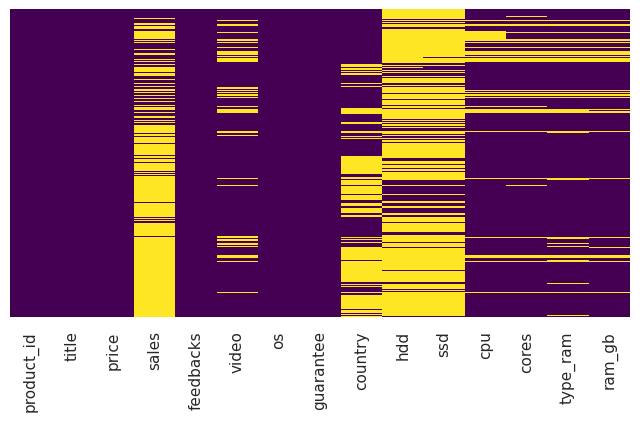

In [ ]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# df2.select_dtypes(include='object').nunique().plot(kind='bar')
# plt.title('Unique Categories per Column')
# plt.show()

In [ ]:
# df2.isnull().sum().plot(kind='bar')
# plt.title('Missing Values by Column')
# plt.show()

In [ ]:
# df2.loc[50].to_excel('df2_50.xlsx')
df2

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,17877962,Системный блок,32900,NaN,0.0,NaN,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,NaN,0.0,NaN,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,1.0,intel uhd graphics 630,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,94.0,nvidia geforce gtx 1660,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,152971271,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4005,152978335,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4006,152979371,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0
4007,152979918,Игровой ПК,70000,NaN,0.0,nvidia,windows 10 pro,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


In [ ]:
# pip install shap

In [ ]:
# pip install catboost

# 4. **Анализ данных**

## Целевые признаки

### pirce

In [ ]:
df2.price.describe()

,price
count,4009.000000
mean,62407.083063
std,34655.341315
min,132.000000
25%,35920.000000
50%,63624.000000
75%,81755.000000
max,235900.000000


<Axes: >

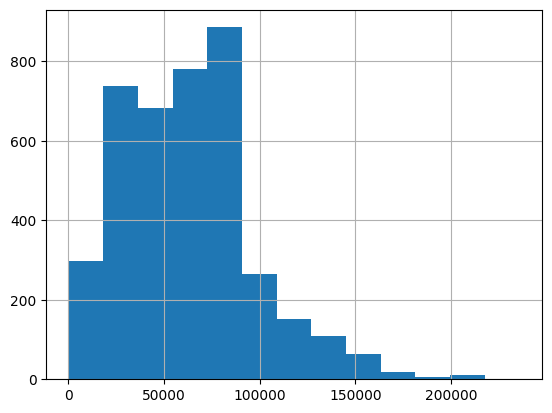

In [ ]:
df2.price.hist(bins='sturges')

<Axes: >

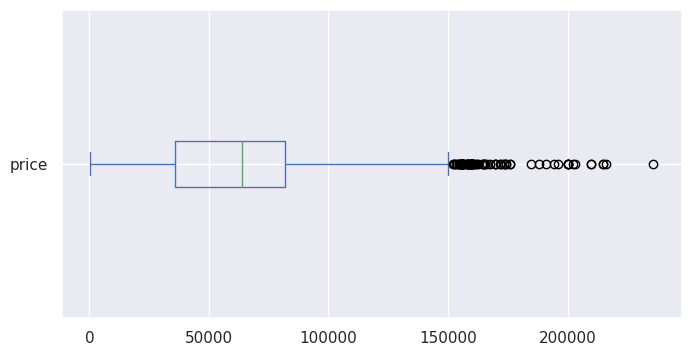

In [ ]:
df2.price.plot(kind='box', vert=False)

In [ ]:
# коэффициенты ассимметрии и эксцесса
# skew = df2.price.skew()
# kurt = df2.price.kurt()
# print('Коэффициент ассиметрии:', skew)
# print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 0.7237248259909304
Коэффициент эксцесса: 1.0760756148580501


In [ ]:
# коэффициент эксцесса больше 1, возможно есть выбросы
# ассиметрия больше 0, т.е. распределение смещено вправо
# stats.shapiro(df2.price)

ShapiroResult(statistic=0.9642162771156433, pvalue=1.9970439987877686e-30)

In [ ]:
df2[df2.price < df2.price.quantile(0.1)]

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
32,21135021,Офисный Компьютер Robotcomp Секретарь V1,21355,20.0,4.0,amd radeon vega 3,windows trial,1095,Россия,NaN,NaN,amd athlon,2.0,DDR 4,8.0
69,29079232,Компьютер,16005,5.0,0.0,Other,windows 10 home,182,Китай,NaN,NaN,Other,4.0,DDR 4,6.0
70,29092367,"Компьютер Chuwi Herobox 8/256 Гб / Мини ПК, не...",20209,10.0,3.0,intel uhd graphics 600,windows 10 home,182,Китай,NaN,NaN,NaN,4.0,DDR 4,8.0
71,32021475,Мини-ПК (неттоп)/ Beelink GK mini/ 8Гб/256Гб/ ...,16005,30.0,5.0,intel hd graphics 600,windows 10 home,182,Китай,NaN,NaN,intel j4125,4.0,DDR 4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,152578155,Офисный компьютер Life Tech Office i3-2120 RAM...,18839,NaN,0.0,intel hd graphics 2000,windows 10 pro,365,Россия,NaN,NaN,intel i3,2.0,DDR 3,8.0
3983,152590490,Компьютер Life Tech Bastion B i5-2400 RAM 8Gb ...,21800,NaN,0.0,intel hd graphics 2000,windows 10 pro,1095,NaN,NaN,NaN,intel i5,2.0,DDR 3,8.0
3990,152726934,Офисный компьютер Life Tech Office i5-2400 RAM...,20315,NaN,0.0,intel hd graphics 2000,windows 10 pro,365,Россия,NaN,NaN,intel i3,2.0,DDR 3,8.0
3991,152726935,Офисный компьютер Life Tech Office i5-2400 RAM...,21988,NaN,0.0,intel hd graphics 2000,windows 10 pro,365,Россия,NaN,NaN,intel i3,2.0,DDR 3,8.0


####
Здесь приведен обзор цен на компьютеры в датасете интернет магазина, как мы видим размах цены от 132р до 235900р,
Здесь указано распределение данных в этом кейсе, они не представляют ценную информацию. По обзору датасета можно отметить что минимальные и максимальные значения (132 и 235900) не являются аномальными данными, среднее значение и медиана не сильно отличаются, около 63000. В низкой ценовой категории (ниже 1 квантиля) много дополнительных комплектующих важных для компьютерного магазина, максимальные цены принадлежат компьютерам с высокопроизводительными данными.

### price_sales

<Axes: xlabel='sales', ylabel='price'>

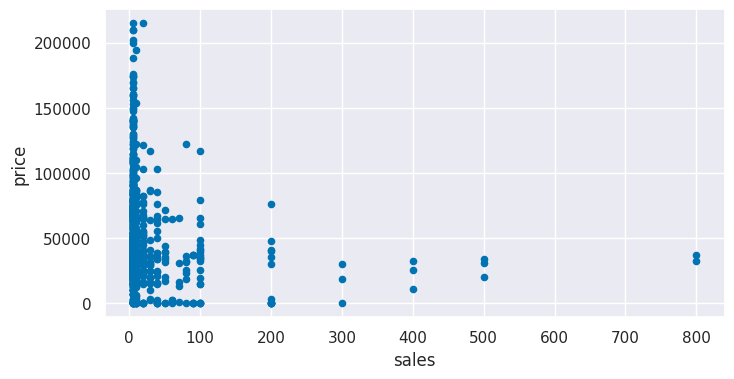

In [ ]:
# есть выброс 5200 его исключим для наглядности
f = df2.sales < 5000
df2[f].plot('sales','price',kind="scatter")

In [ ]:
clean_data = df2[['sales', 'price']].dropna()

# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['sales'], clean_data['price'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: -0.08653528404762006
p-value: 0.005361424806950276


p-value ниже критического значения, взаимосвязь есть но она небольшая отрицательная

### sales_feedbacks

<Axes: xlabel='feedbacks', ylabel='price'>

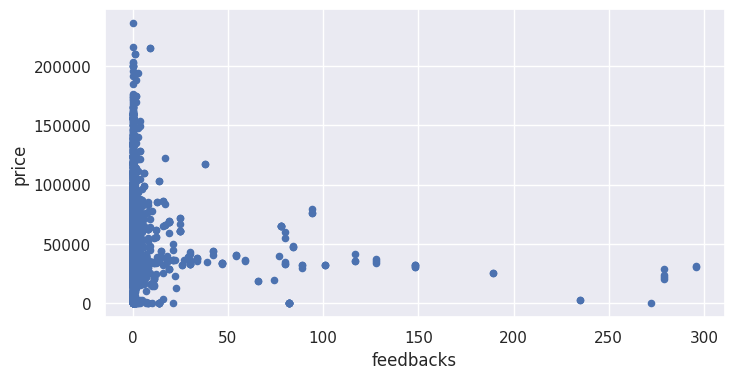

In [ ]:
df2.plot('feedbacks','price',kind="scatter")

In [ ]:
clean_data = df2[['feedbacks', 'price']].dropna()

# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['feedbacks'], clean_data['price'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: -0.12346209217568582
p-value: 4.336471588913778e-15


Взаимосвязь price с sales и feedbacks есть если учесть что значение p-value ниже критического значения, но очень слабая и отрицательная, т.е. можно сказать чем дороже компьютеры тем реже покупаются, что вполне логично. И как видно на основном датасете в топе продаж блок питания по низкой цене.

### sales

In [ ]:
df2.sales.describe()

,sales
count,1034.000000
mean,24.323017
std,171.082132
min,5.000000
25%,5.000000
50%,5.000000
75%,10.000000
max,5200.000000


<Axes: >

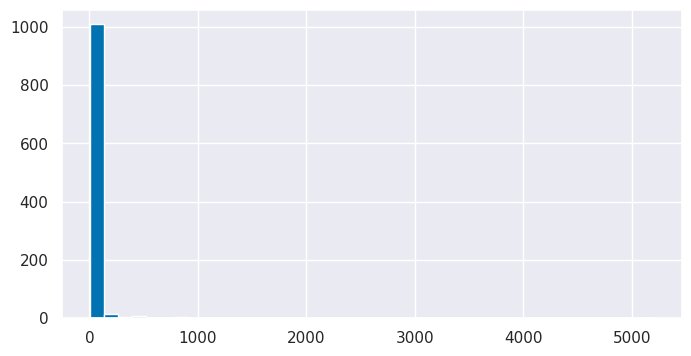

In [ ]:
df2.sales.hist(bins=40)

### feedbacks

In [ ]:
df2.feedbacks.describe()

,feedbacks
count,4009.000000
mean,2.815166
std,17.527296
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,296.000000


<Axes: >

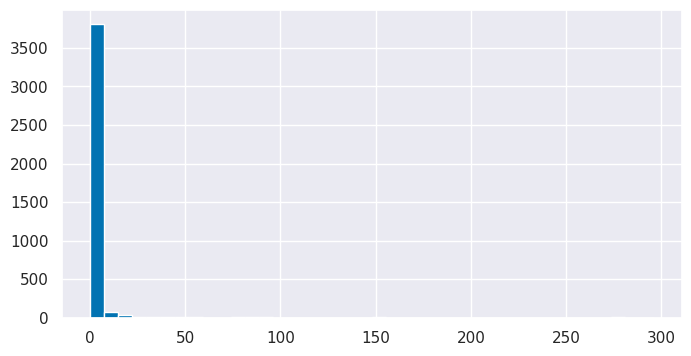

In [ ]:
df2.feedbacks.hist(bins=40)


<Axes: >

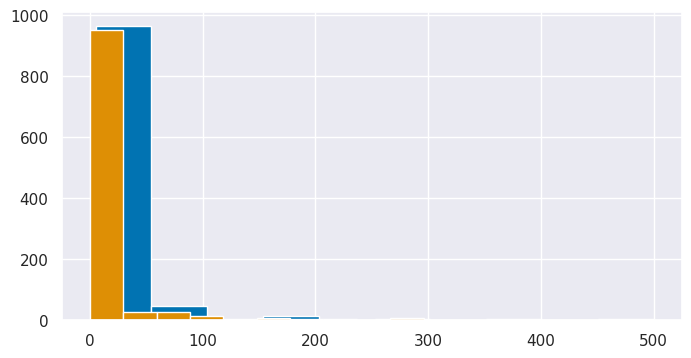

In [ ]:
df_s = df2.sales < 800

df2[df_s].sales.hist()
df2[df_s].feedbacks.hist()




Картины распределения продаж и отзывов схожи, что логично, их мы прооанализируем позже.

Для анализа влияния комплектующих, как я отмечал ранее создадм датасет содержащий только компьютеры, данный датасет понадобится для общих выводов

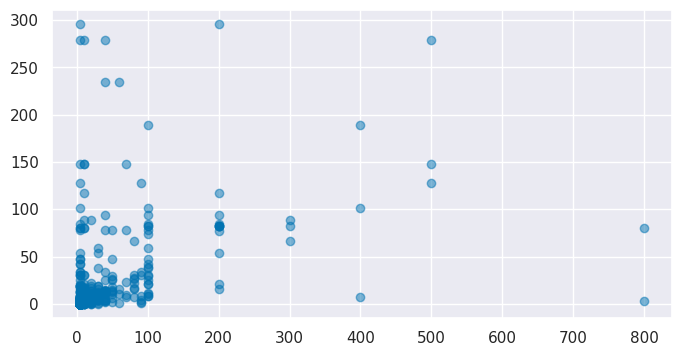

In [ ]:
plt.scatter(df2[f]['sales'], df2[f]['feedbacks'], alpha=0.5)
plt.show()

## 4.1 Анализ влияния на цену/ df_pc

In [ ]:
# датасет с компьютерами
df_pc = df2[df2.cpu.notna()|
           df2.cores.notna()|
           df2.video.notna()|
           df2.type_ram.notna()|
           df2.ram_gb.notna()|
           df2.hdd.notna()|
           df2.ssd.notna()]

In [ ]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3616 non-null   int64  
 1   title       3616 non-null   object 
 2   price       3616 non-null   int64  
 3   sales       878 non-null    float64
 4   feedbacks   3616 non-null   float64
 5   video       3464 non-null   object 
 6   os          3616 non-null   object 
 7   guarantee   3616 non-null   int64  
 8   country     2027 non-null   object 
 9   hdd         1100 non-null   float64
 10  ssd         1150 non-null   float64
 11  cpu         3491 non-null   object 
 12  cores       3565 non-null   float64
 13  type_ram    3478 non-null   object 
 14  ram_gb      3603 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 452.0+ KB


In [ ]:
rem_columns = ['product_id',
               'title',
               'sales',
               'feedbacks']

 # удаляем ненужные колонки
df_pc.drop(columns=rem_columns, inplace=True)

<ipython-input-8-147e61b1757f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc.drop(columns=rem_columns, inplace=True)


In [ ]:
df_pc.duplicated().sum()

1451

In [ ]:
# Удаляем дубликаты
df_pc.drop_duplicates(inplace=True)
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165 entries, 0 to 4004
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      2165 non-null   int64  
 1   video      2020 non-null   object 
 2   os         2165 non-null   object 
 3   guarantee  2165 non-null   int64  
 4   country    1665 non-null   object 
 5   hdd        589 non-null    float64
 6   ssd        639 non-null    float64
 7   cpu        2040 non-null   object 
 8   cores      2115 non-null   float64
 9   type_ram   2038 non-null   object 
 10  ram_gb     2152 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 203.0+ KB


<ipython-input-10-a6b6d8f37ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc.drop_duplicates(inplace=True)


In [ ]:
df_pc

,price,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
0,10805,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
1,32900,NaN,отсутствует,0,Китай,NaN,NaN,intel i5,NaN,NaN,16.0
2,35720,NaN,отсутствует,0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,39237,intel uhd graphics 630,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,8.0
4,76188,nvidia geforce gtx 1660,windows trial,1095,Россия,NaN,NaN,intel i5,6.0,DDR 4,16.0
...,...,...,...,...,...,...,...,...,...,...,...
3990,20315,intel hd graphics 2000,windows 10 pro,365,Россия,NaN,NaN,intel i3,2.0,DDR 3,8.0
3991,21988,intel hd graphics 2000,windows 10 pro,365,Россия,NaN,NaN,intel i3,2.0,DDR 3,8.0
3994,84000,nvidia geforce rtx 3060,windows 10 pro,365,NaN,1000.0,512.0,intel i5,6.0,DDR 4,16.0
3999,77250,nvidia,windows 10,365,NaN,1000.0,500.0,intel i5,6.0,DDR 4,16.0


In [ ]:
df_pc.describe().to_excel('df_pc_describe.xlsx')
df_pc.describe()

,price,guarantee,hdd,ssd,cores,ram_gb
count,2165.000000,2165.000000,589.000000,639.000000,2115.000000,2152.000000
mean,60280.152425,668.746882,975.191851,373.267606,6.168794,16.782993
std,35423.652779,420.322422,296.111601,218.732661,4.070845,11.228112
min,2418.000000,0.000000,250.000000,16.000000,1.000000,1.000000
25%,33932.000000,365.000000,1000.000000,240.000000,4.000000,8.000000
50%,53016.000000,365.000000,1000.000000,256.000000,6.000000,16.000000
75%,77000.000000,1095.000000,1000.000000,480.000000,6.000000,16.000000
max,235900.000000,1095.000000,3000.000000,2000.000000,24.000000,64.000000


In [ ]:
df_cat = df_pc[df_pc.select_dtypes(include=[object]).columns].describe().T
df_cat.to_excel('df_cat_describe.xlsx')
df_cat

,count,unique,top,freq
video,2020,43,nvidia geforce rtx 3050,234
os,2165,14,windows 10 pro,1046
country,1665,4,Россия,1409
cpu,2040,24,intel i5,598
type_ram,2038,3,DDR 4,1696


Данный датасет состоит только из компьютеров, с его помощью мы проанализируем влияние комплектующих на цену, от основного датасета здесь 2165 строк и 11 колонок

### **- Количественные данные**

### price

<Axes: >

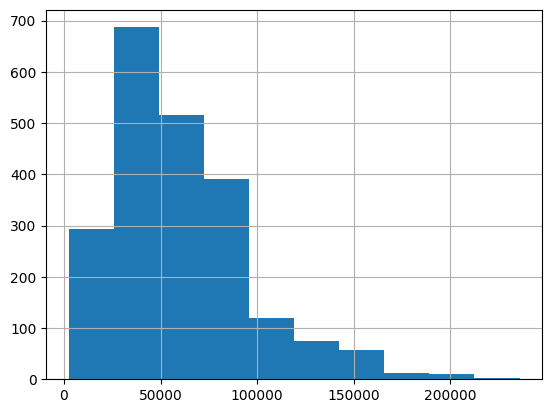

In [ ]:
df_pc.price.hist()

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.price.skew()
kurt = df_pc.price.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 1.2615252903478866
Коэффициент эксцесса: 1.9584920429183672


In [ ]:
# коэффициент эксцесса больше 1, возможно есть выбросы
# ассиметрия больше 0, т.е. распределение смещено вправо
stats.shapiro(df_pc.price)

ShapiroResult(statistic=0.9099398572262792, pvalue=5.26492019180125e-34)

In [ ]:
df_pc.price.describe()

,price
count,2165.000000
mean,60280.152425
std,35423.652779
min,2418.000000
25%,33932.000000
50%,53016.000000
75%,77000.000000
max,235900.000000


In [ ]:
# df_pc[df_pc.price < df_pc.price.quantile(0.1)]

 Значение P-value намного меньше 0.05, также график не имеет "колокольной" формы  это значит что данные не имеют нормального распределения. Минимальное значение в данном ккейсе 2418, максимальное 235900, медиана 53233.5 меньше чем среднее арифметическое 60283.7 что согласуется с правосторонней асимметрией.

### cores

In [ ]:
# используем value_counts, она подходит для описания дискретных значений
df_pc.cores.value_counts()

,count
cores,
6.0,771
4.0,665
2.0,242
8.0,166
12.0,103
10.0,75
24.0,60
16.0,19
14.0,7


наибольшее количество 6 и 4 ядер процессоров

In [ ]:
# df_pc.cores.hist()

<Axes: xlabel='cores', ylabel='Count'>

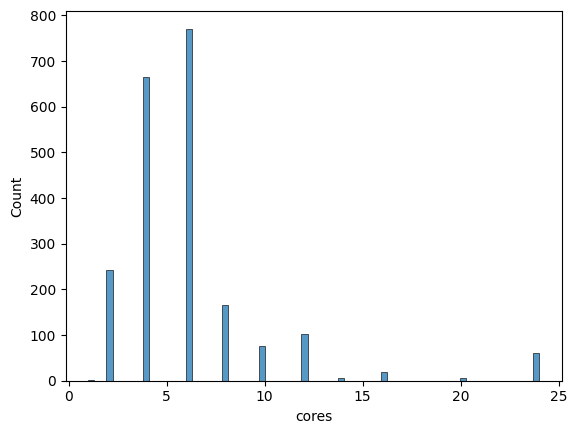

In [ ]:
sns.histplot(df_pc.cores)

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.cores.skew()
kurt = df_pc.cores.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)
#
shapiro = stats.shapiro(df_pc.cores)
print('Критерии Шапиро:', shapiro)

Коэффициент ассиметрии: 2.657679455022963
Коэффициент эксцесса: 8.594504616454586
Критерии Шапиро: ShapiroResult(statistic=nan, pvalue=nan)


В данном случае данные количественные дискретные, так как количество ядер процессора может принимать только целочисленные значения. Тем не менее сделаем статистическую оценку. Далее обьем оперативной памяти и жестких дисков как увидим на графиках бужет иметь подобную картину.

**Коэффициент асимметрии** (2.66):Положительное значение говорит о правосторонней асимметрии, что означает, что в распределении длинный хвост направлен вправо. Значение около 2.66 указывает на довольно значительную асимметрию. Это свидетельствует о том, что в данных есть значительное количество больших значений, смещающих распределение вправо.

**Коэффициент эксцесса** (8.59):
Это значение существенно выше 0, что указывает на то, что распределение имеет остроконечную форму (лептокуртозное распределение). Данные содержат больше экстремальных значений (выбросов) по сравнению с нормальным распределением.
Критерий Шапиро (ShapiroResult: statistic=nan, pvalue=nan):

Если в результате теста Шапиро-Уилка выводятся значения nan, это может указывать на проблемы с данными. Например, слишком маленький или слишком большой размер выборки, или наличие бесконечных значений (inf) или NaN в данных. Тест не смог корректно определить, является ли распределение нормальным.

### ram_gb

In [ ]:
df_pc.ram_gb.value_counts()

,count
ram_gb,
16.0,1063
8.0,556
32.0,326
4.0,133
64.0,57
2.0,12
6.0,4
1.0,1


наиболее часто применяется память 16 gb

<Axes: xlabel='ram_gb', ylabel='Count'>

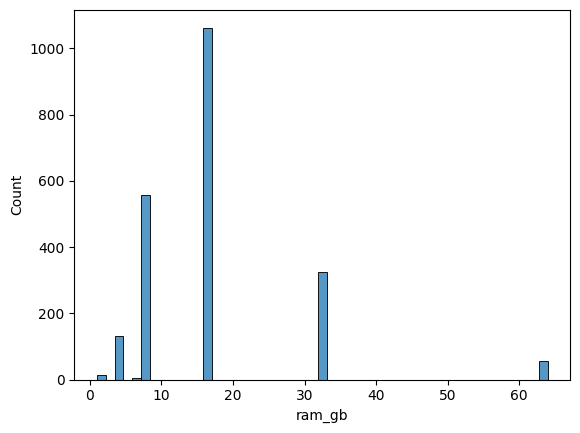

In [ ]:
sns.histplot(df_pc.ram_gb)

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.ram_gb.skew()
kurt = df_pc.ram_gb.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)
#
shapiro = stats.shapiro(df_pc.ram_gb)
print('Критерии Шапиро:', shapiro)

Коэффициент ассиметрии: 2.1190837586209517
Коэффициент эксцесса: 6.040195875436664
Критерии Шапиро: ShapiroResult(statistic=nan, pvalue=nan)


Распределение также имеет правостороннюю асимметрию, т.е. много экстремальных значений, тест Шапиро Уилка также не смог корректно определить нормальность распределения

### hdd

In [ ]:
df_pc.hdd.value_counts()

,count
hdd,
1000.0,473
500.0,80
2000.0,26
1024.0,5
250.0,2
3000.0,1
512.0,1
256.0,1


наиболее часто применяемый hdd 1000 gb

<Axes: xlabel='hdd', ylabel='Count'>

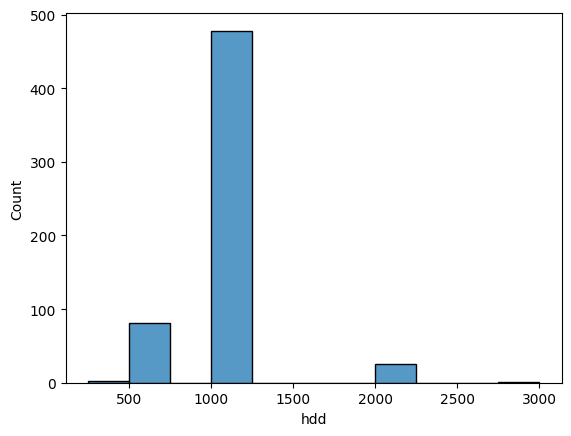

In [ ]:
sns.histplot(df_pc.hdd)

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.hdd.skew()
kurt = df_pc.hdd.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)
#
shapiro = stats.shapiro(df_pc.hdd)
print('Критерии Шапиро:', shapiro)

Коэффициент ассиметрии: 1.7400401950562923
Коэффициент эксцесса: 8.25511731140789
Критерии Шапиро: ShapiroResult(statistic=nan, pvalue=nan)


Правосторонняя асимметрия, остроконечное распределение с большим количеством выбросов вправо

### ssd

In [ ]:
df_pc.ssd.value_counts()

,count
ssd,
480.0,150
256.0,131
240.0,108
512.0,100
120.0,68
500.0,26
1000.0,18
128.0,17
250.0,11


ssd - 480 gb

<Axes: xlabel='ssd', ylabel='Count'>

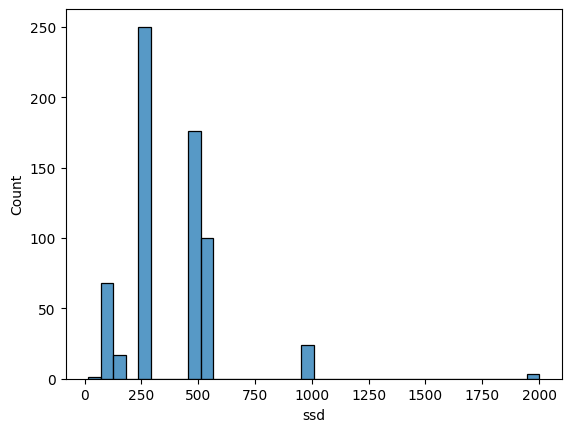

In [ ]:
sns.histplot(df_pc.ssd, )# label='ssd'
# plt.legend()

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.ssd.skew()
kurt = df_pc.ssd.kurt()
print('Коэффициент асимметрии:', skew)
print('Коэффициент эксцесса:', kurt)
#
shapiro = stats.shapiro(df_pc.ssd)
print('Критерии Шапиро:', shapiro)

Коэффициент ассиметрии: 2.5798638008897625
Коэффициент эксцесса: 14.251173460414996
Критерии Шапиро: ShapiroResult(statistic=nan, pvalue=nan)


Сильная правосторонняя асимметрия, высокая остроконечность, тест Шапиро не применим.

### Гарантийный срок

In [ ]:
df_pc.guarantee.value_counts()

,count
guarantee,
1095,1007
365,802
0,265
730,67
182,16
91,6
14,1
60,1


1095 дней, т.е. 3 года наиболее распространенная гарантия

<Axes: xlabel='guarantee', ylabel='Count'>

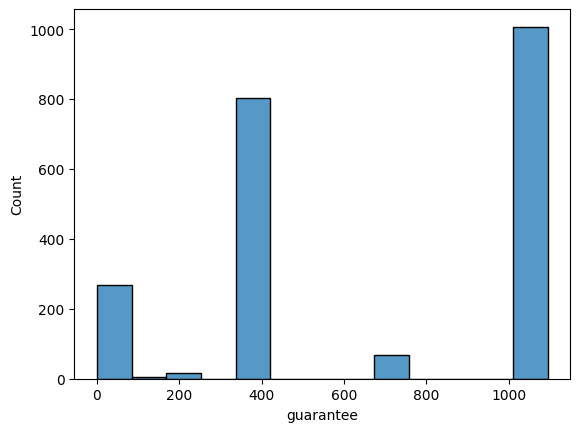

In [ ]:
sns.histplot(df_pc.guarantee)

In [ ]:
# коэффициенты ассимметрии и эксцесса
skew = df_pc.guarantee.skew()
kurt = df_pc.guarantee.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)
#
shapiro = stats.shapiro(df_pc.guarantee)
print('Критерии Шапиро:', shapiro)

Коэффициент ассиметрии: -0.1696423541084072
Коэффициент эксцесса: -1.5943552752626209
Критерии Шапиро: ShapiroResult(statistic=0.764586134765885, pvalue=2.855799215821694e-48)


Небольшая левосторонняя асимметрия, низкая остроконечность, распределение значительно не нормальное.

### **- Категориальные признаки**

### cpu

In [ ]:
df_pc.cpu.describe()

,cpu
count,2040
unique,24
top,intel i5
freq,598


In [ ]:
cpus = df_pc.cpu.value_counts()

<ipython-input-134-deeae98055c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=cpus.index, x=cpus.values, palette='colorblind')


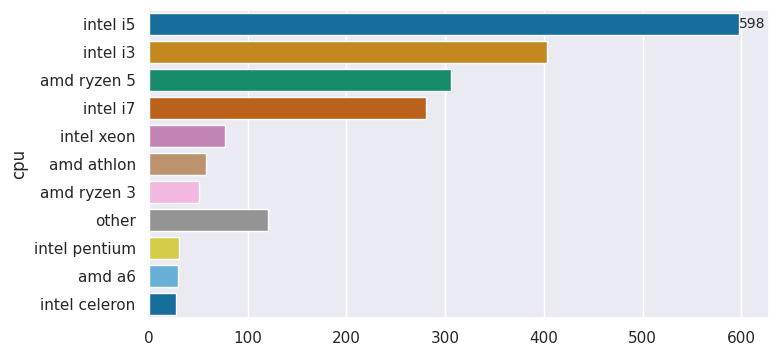

In [ ]:
other_cpu  = cpus[cpus<20]
cpus = cpus[cpus>20]

cpus['other'] = other_cpu.sum()
# cpus = cpus.sort_values()
# plt.barh(cpus.index, cpus.values)
# plt.show()
ax = sns.barplot(y=cpus.index, x=cpus.values, palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

В топе intel i5, также Intel i3 и amd rayzen 5

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [ ]:
# results1 = smf.ols('price ~ cpu', data=df_pc).fit()
# results1.summary()

### video

In [ ]:
df_pc.video.describe()

,video
count,2020
unique,43
top,nvidia geforce rtx 3050
freq,234


In [ ]:
# videos = df_pc.video.value_counts()

# other_video  = videos[videos<20]
# videos = videos[videos>20]

# videos['other'] = other_video.sum()
# videos = videos.sort_values()
# plt.barh(videos.index, videos.values)
# plt.show()

<ipython-input-135-30485da9effb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=videos.index, x=videos.values, palette='colorblind')


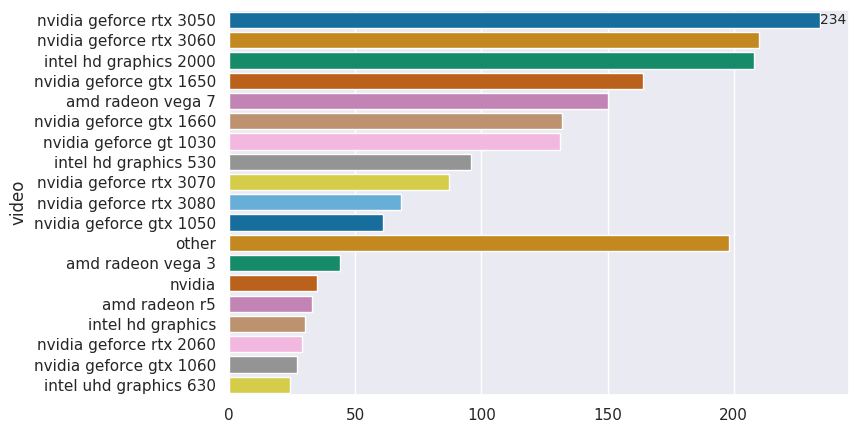

In [ ]:
videos = df_pc.video.value_counts()

other_video  = videos[videos<20]
videos = videos[videos>20]

videos['other'] = other_video.sum()

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(y=videos.index, x=videos.values, palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

В топе Nvidia GTX series а также Intel HD graphics

### type_ram

In [ ]:
df_pc.type_ram.describe()

,type_ram
count,2038
unique,3
top,DDR 4
freq,1696


<ipython-input-18-427f698d9f27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_pc.type_ram.value_counts().index, y=df_pc.type_ram.value_counts().values, palette='colorblind')


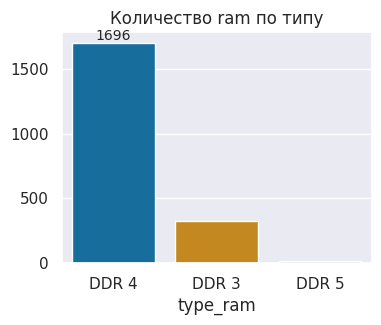

In [ ]:
sns.set(rc={'figure.figsize':(4,3)})
ax = sns.barplot(x=df_pc.type_ram.value_counts().index, y=df_pc.type_ram.value_counts().values, palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Количество ram по типу')
plt.show()

В большинстве случаев применяется DDR 4

### Операционная система

In [ ]:
df_pc.os.describe()

,os
count,2165
unique,14
top,windows 10 pro
freq,1046


In [ ]:
# sns.set(rc={'figure.figsize':(8,10)})
# ax = sns.barplot(y=df_pc.os.value_counts().index, x=df_pc.os.value_counts().values)
# ax.bar_label(ax.containers[0], fontsize=10)
# plt.title('Количество os по типу')
# plt.show()

<ipython-input-19-07bed9f8ef4c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=oss.index, x=oss.values, palette='colorblind')


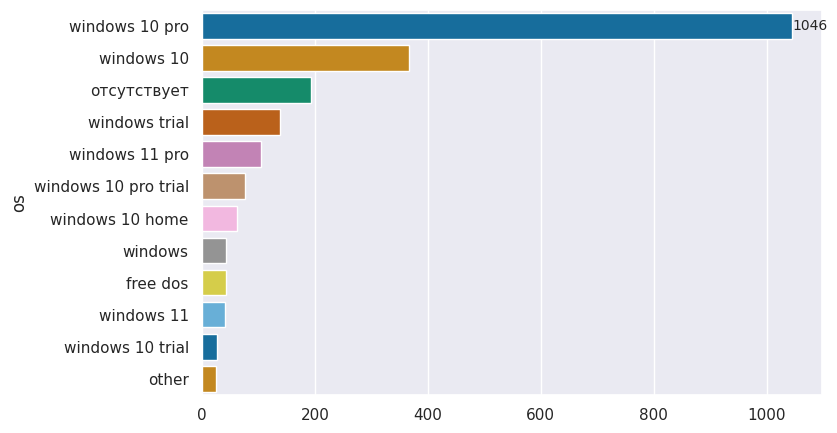

In [ ]:
oss = df_pc.os.value_counts()
other_os  = oss[oss<20]
oss = oss[oss>20]

oss['other'] = other_os.sum()

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(y=oss.index, x=oss.values, palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

В топе windows 10 pro

In [ ]:
# stat, p = scipy.stats.shapiro(df_pc['os'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))

### Страна производства

In [ ]:
df_pc.country.describe()

,country
count,1665
unique,4
top,Россия
freq,1409


In [ ]:
countries = df_pc.country.value_counts()
# sns.set(rc={'figure.figsize':(8,4)})
# countries = countries.sort_values()
# plt.barh(countries.index, countries.values)
# plt.show()

<ipython-input-22-207982d3a82b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=countries.index, y=countries.values, palette='colorblind')


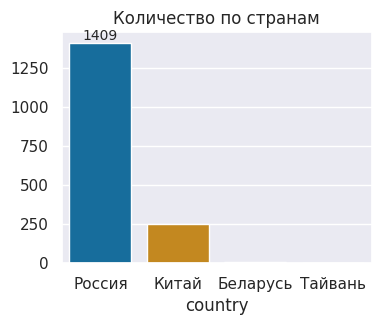

In [ ]:
sns.set(rc={'figure.figsize':(4,3)})
ax = sns.barplot(x=countries.index, y=countries.values, palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Количество по странам')
plt.show()

Самое большое количество компьютеров произведено в России

## **Кореляционный анализ**

### взаимосвязь количественных признаков

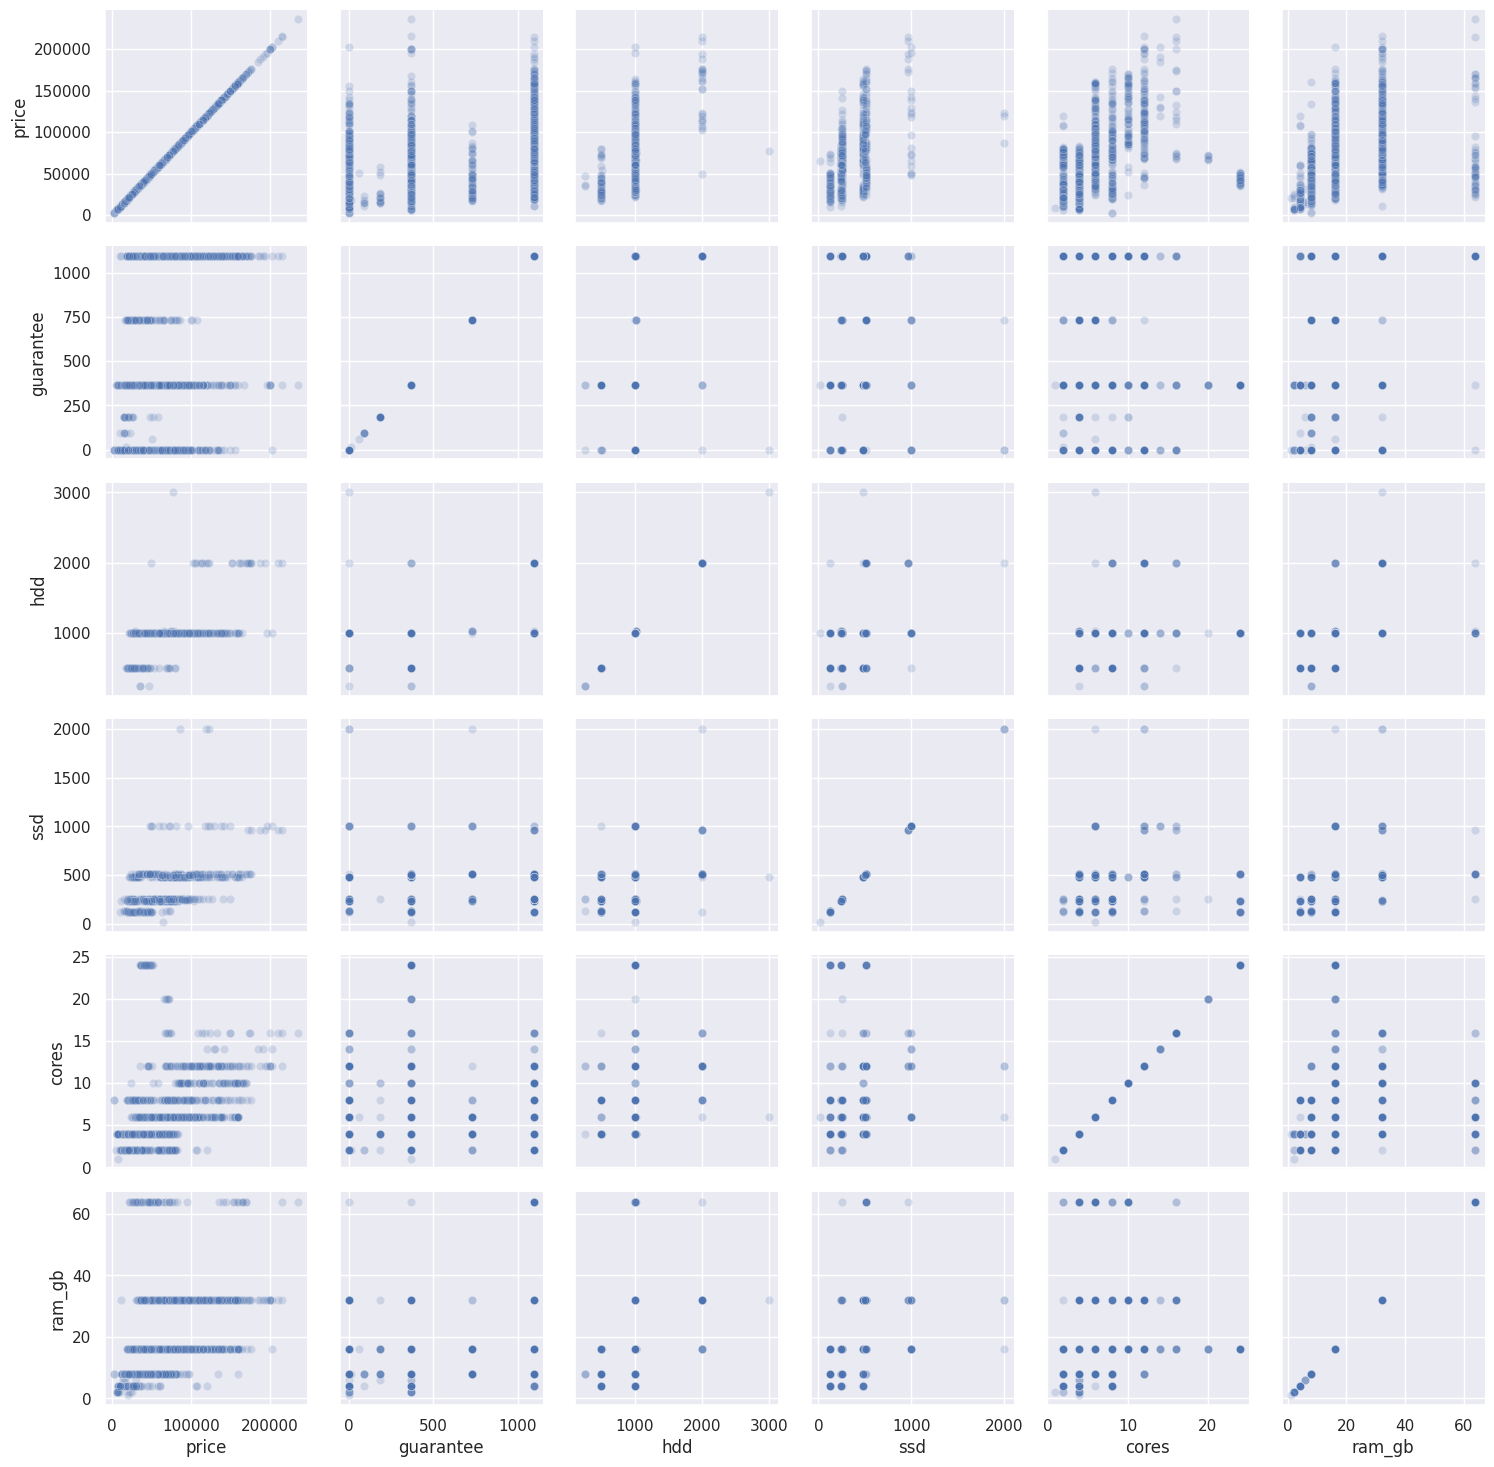

In [ ]:
g = sns.PairGrid(df_pc)
g.map(sns.scatterplot, alpha=0.2)
plt.show()

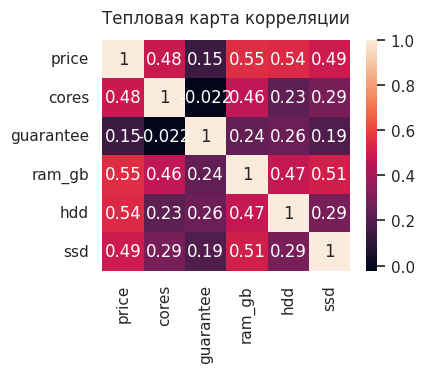

In [ ]:
hm = sns.heatmap(df_pc[['price', 'cores', 'guarantee', 'ram_gb', 'hdd', 'ssd']].corr(method = 'spearman'),annot=True)
hm.set_title('Тепловая карта корреляции', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
df_pc[['price', 'cores', 'ram_gb', 'guarantee', 'hdd', 'ssd']].corr(method='pearson')

,price,cores,ram_gb,guarantee,hdd,ssd
price,1.000000,0.321980,0.437258,0.147286,0.560404,0.475496
cores,0.321980,1.000000,0.215506,-0.116399,0.192745,0.165851
ram_gb,0.437258,0.215506,1.000000,0.258106,0.371241,0.392474
guarantee,0.147286,-0.116399,0.258106,1.000000,0.268850,0.066073
hdd,0.560404,0.192745,0.371241,0.268850,1.000000,0.336426
ssd,0.475496,0.165851,0.392474,0.066073,0.336426,1.000000


Описание корреляций:

**price** (цена):
Наиболее сильная положительная корреляция с HDD (0.560) и SSD (0.475), что указывает на то, что увеличение объема памяти на накопителях связано с увеличением цены.
Умеренная положительная корреляция с RAM (0.437) и количеством ядер (0.322), что также отражает тенденцию увеличения цены с ростом этих характеристик.
Слабая положительная корреляция с гарантией (0.147).

**cores** (ядра):
Слабая положительная корреляция с ценой (0.322) и RAM (0.216), что предполагает незначительное увеличение цены и объема оперативной памяти при увеличении числа ядер.
Слабая отрицательная корреляция с гарантией (-0.116), указывающая на небольшое снижение срока гарантии при увеличении числа ядер.
Небольшая положительная корреляция с HDD (0.193) и SSD (0.166), что может говорить о слабой взаимосвязи между количеством ядер и объемом накопителей.

**ram_gb** (оперативная память):
Умеренная положительная корреляция с ценой (0.437) и SSD (0.392), что предполагает, что более высокая оперативная память часто встречается с большими объемами SSD и более высокой ценой.
Слабая положительная корреляция с гарантией (0.258) и HDD (0.371), что показывает небольшое увеличение объема оперативной памяти с увеличением гарантийного срока и объема жесткого диска.

**guarantee** (гарантия):
Слабая положительная корреляция с ценой (0.147), RAM (0.258), HDD (0.269) и SSD (0.066), что предполагает небольшую связь между увеличением гарантийного срока и другими характеристиками.
Слабая отрицательная корреляция с количеством ядер (-0.116), что указывает на незначительное снижение гарантийного срока при увеличении числа ядер.

**hdd** (жесткий диск):
Наиболее сильная положительная корреляция с ценой (0.560), что означает, что увеличение объема жесткого диска тесно связано с увеличением цены.
Умеренная положительная корреляция с RAM (0.371) и SSD (0.336), что указывает на связь между объемом HDD и объемами других накопителей.

**ssd** (твердотельный накопитель):
Умеренная положительная корреляция с ценой (0.476) и RAM (0.392), что показывает, что увеличение объема SSD обычно связано с увеличением цены и объема оперативной памяти.
Слабая положительная корреляция с HDD (0.336) и гарантией (0.066), что предполагает наличие связи между объемами различных типов накопителей и небольшую связь с гарантией.

В целом, из матрицы видно, что цена больше всего зависит от объема HDD и SSD, а также в умеренной степени от объема оперативной памяти. Количество ядер оказывает слабое влияние на остальные параметры, а гарантия слабо коррелирует с другими характеристиками.

Проверим взаимосвязь признаков попарно

### cores_price

<Axes: xlabel='cores', ylabel='price'>

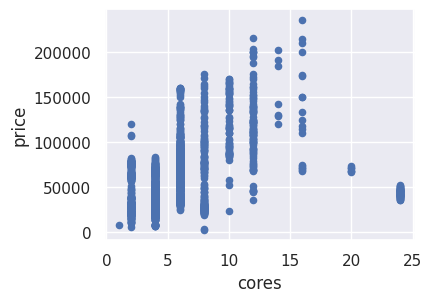

In [ ]:
df_pc.plot('cores','price',kind="scatter")

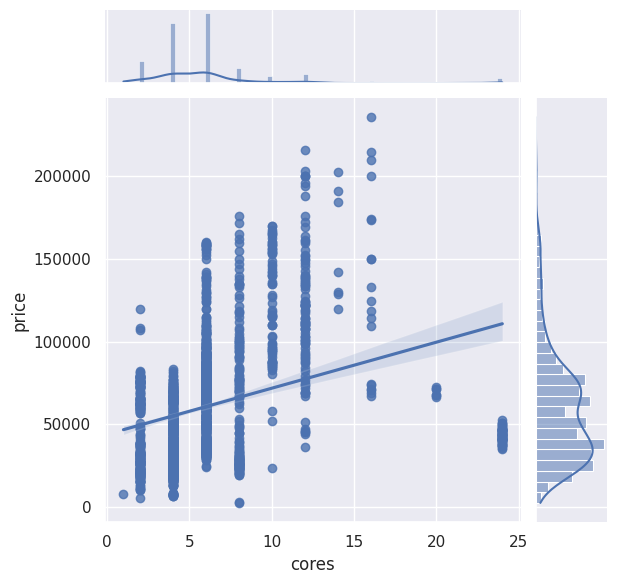

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot(x='cores', y='price', data=df_pc, kind="reg")

In [ ]:
clean_cpu = df_pc[['cores', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_cpu['cores'], clean_cpu['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.3219798672720935
p-value: 3.248579163501588e-52


Корреляция 0.32 указывает на слабую положительную связь между переменными. p-значение практически равно нулю, что свидетельствует о высокой статистической значимости этой связи.

Данный признак включим в модель регрессии

### ram_gb price

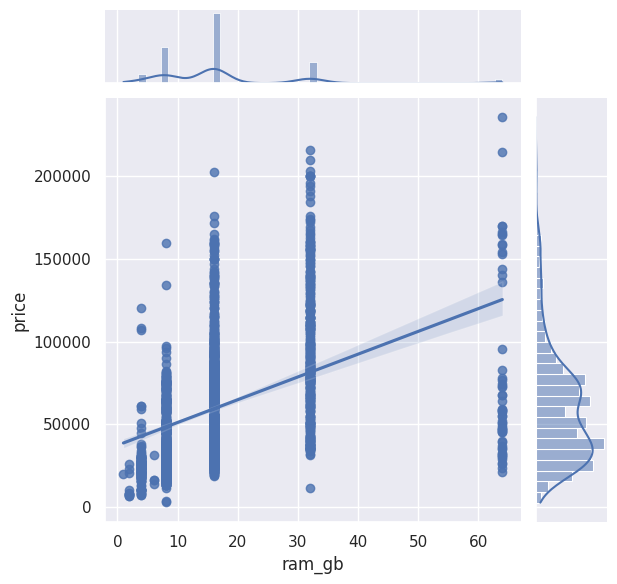

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot(x='ram_gb', y='price', data=df_pc, kind="reg")

In [ ]:
clean_data = df_pc[['ram_gb', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['ram_gb'], clean_data['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.43725824702039934
p-value: 3.359907453804601e-101


Также имеется положительная корреляция и высокая статистическая связь, также включим в модель регрессии

### hdd price

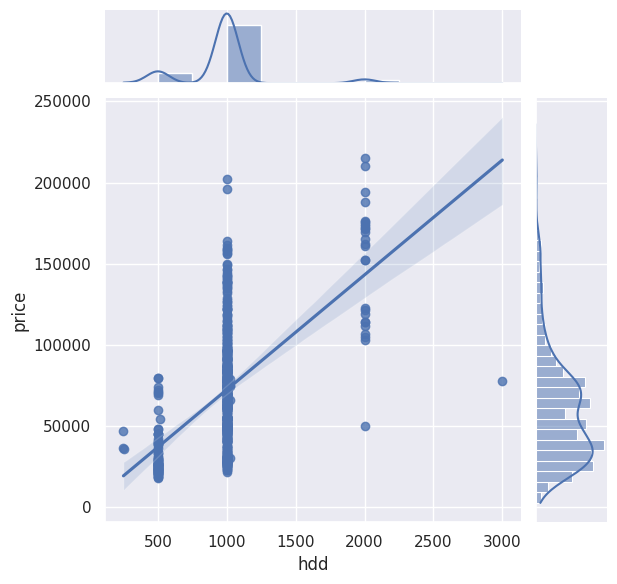

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot(x='hdd', y='price', data=df_pc, kind="reg")

In [ ]:
clean_data = df_pc[['hdd', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['hdd'], clean_data['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.5604043663271918
p-value: 5.231284376911209e-50


Также имеется положительная корреляция и высокая статистическая связь, также включим в модель регрессии

### ssd price

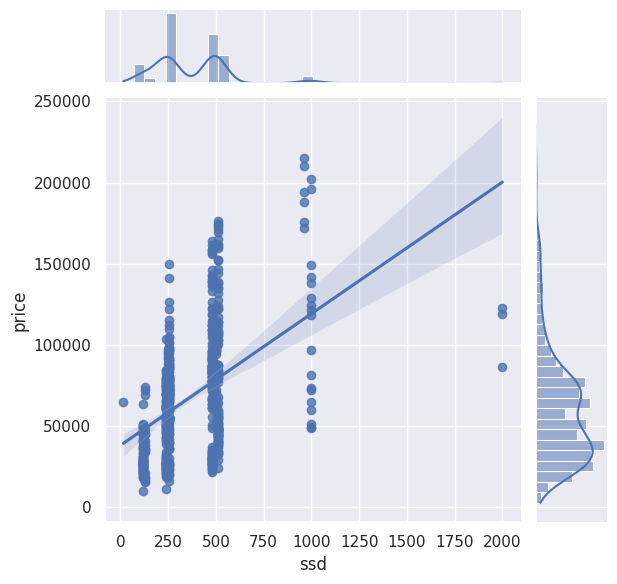

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot(x='ssd', y='price', data=df_pc, kind="reg")

In [ ]:
clean_data = df_pc[['ssd', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['ssd'], clean_data['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.47549613063170637
p-value: 2.3280563297780625e-37


Также имеется положительная корреляция и высокая статистическая связь, также включим в модель регрессии

### guarantee price

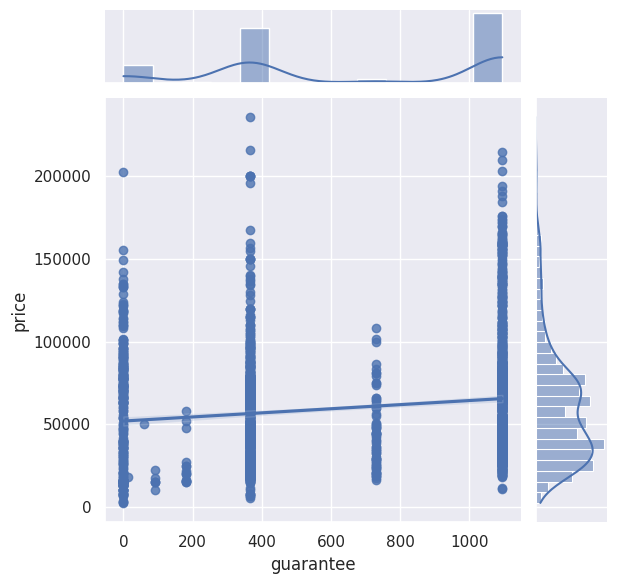

In [ ]:
sns.jointplot(x='guarantee', y='price', data=df_pc, kind="reg")

In [ ]:
clean_data = df_pc[['guarantee', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_data['guarantee'], clean_data['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.1472861555224405
p-value: 5.706458249360355e-12


Связь статистически значима, но имеет наименьшее значение из всех количественных признаков

## Категориальные признаки

In [ ]:
# импортируем метод
from scipy.stats import kruskal

### cpu_price

In [ ]:
df_cpu_n = df_pc[df_pc.cpu.notna()]

In [ ]:
# cp = df_cpu_n.plot("cpu",'price',kind="scatter")
# plt.xticks(rotation=90)

In [ ]:
# cpu_cat[T.amd ryzen 7]                1.011e+04   2528.437      3.999      0.000    5110.520    1.51e+04
# cpu_cat[T.amd рязань 4650]           -1.643e+04   3911.922     -4.199      0.000   -2.42e+04   -8688.117
# cpu_cat[T.intel i7]                    1.19e+04   1702.814      6.990      0.000    8533.835    1.53e+04
# cpu_cat[T.intel i9]                   3.136e+04   4044.517      7.754      0.000    2.34e+04    3.94e+04
# cpu_cat[T.intel xeon]

In [ ]:
# sns.set(rc={'figure.figsize':(10,5)})
# sns.catplot(x='cpu', y='price', data=df_cpu_n)
# plt.xticks(rotation=90)

Text(0.5, 1.0, 'Взаимосвязь cpu and price')

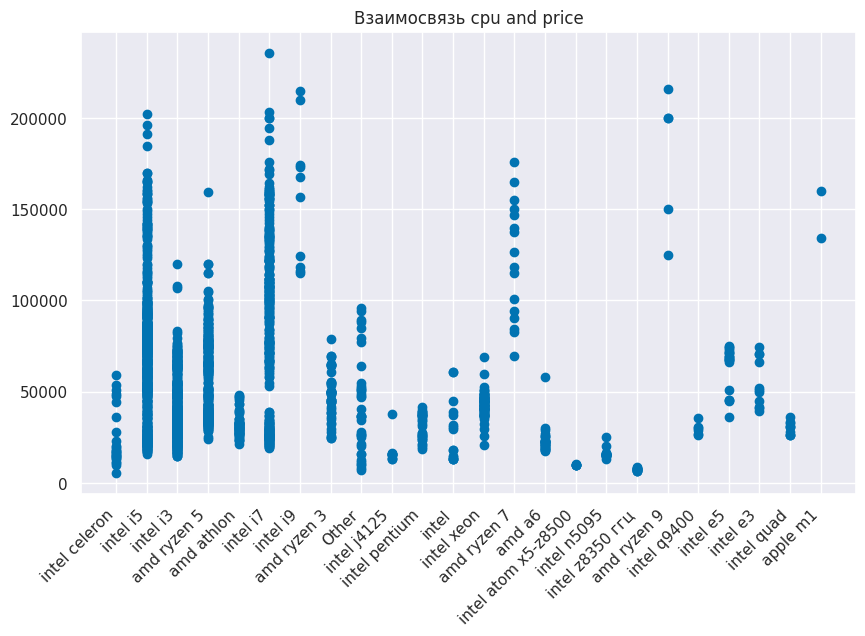

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_cpu_n.cpu, y = df_cpu_n.price )
plt.xticks(rotation=45, ha='right')
plt.title('Взаимосвязь cpu and price')

на первый взгляд у цены и типа процееора нет взаимосвязи, но если отсортировать процессоры по цене, то взаимосвязь прослеживается, думаю есть смысл включить данную категорию в модель регрессии и там сней поработать

In [ ]:
df_pc_cpu = df_pc[df_pc.cpu.notnull()]
df_pc_cpu.shape

(2040, 11)

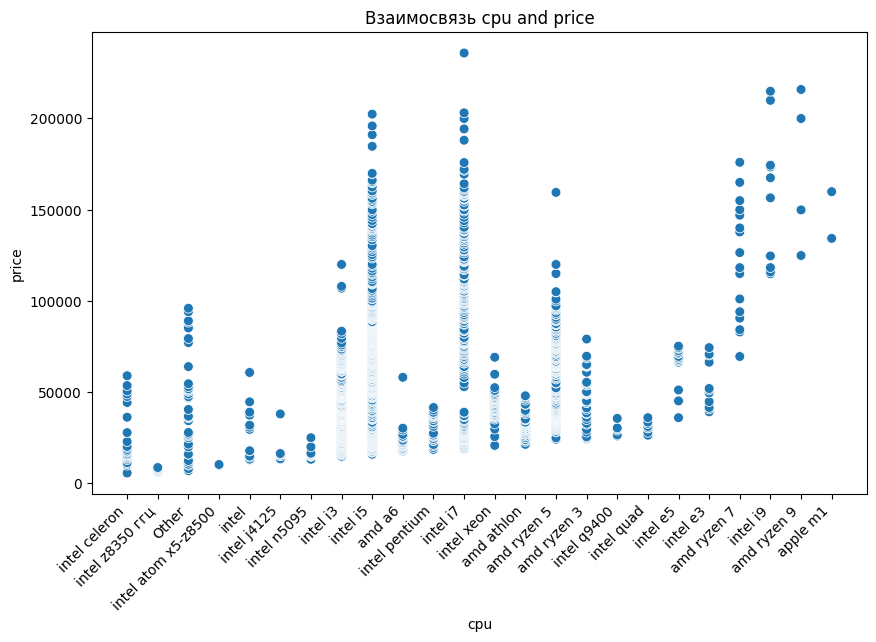

In [ ]:
# Упорядочить категории по значению
fig, ax = plt.subplots(figsize=(10, 6))
df_pc_cpu = df_pc_cpu.sort_values('price')

# Построить scatterplot
sns.scatterplot(data=df_pc_cpu, x='cpu', y='price', size=20, legend=False, sizes=(50, 500), )
plt.xticks(rotation=45, ha='right')
plt.title('Взаимосвязь cpu and price')
plt.show()

<ipython-input-23-053327cb5edb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='cpu', x='price', data=df_pc,


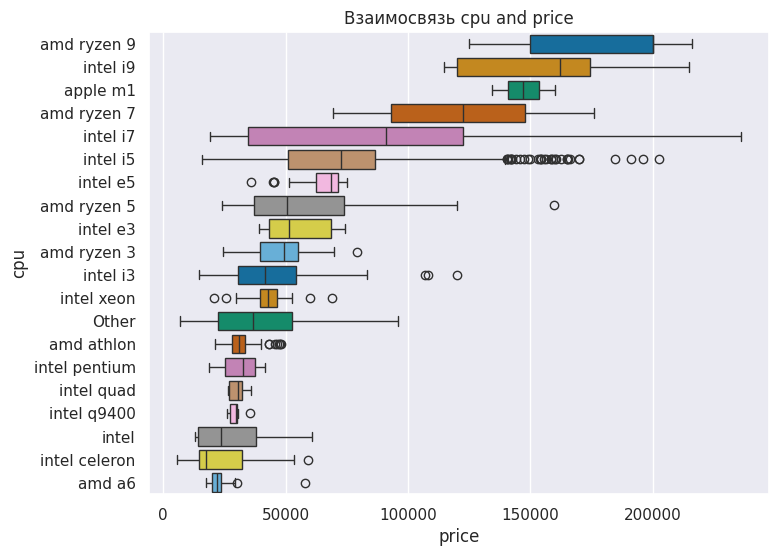

In [ ]:
# процессор [:20]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y='cpu', x='price', data=df_pc,
            order=df_pc.groupby('cpu')['price'].describe().sort_values(by='mean', ascending=False).index[:20], palette='colorblind')
# здесь важно именно среднее арифметическое
plt.title('Взаимосвязь cpu and price')
plt.show()

In [ ]:
# Процессор
groups_cpu = [group['price'].values for name, group in df_pc.groupby('cpu')]

# Проведение теста Краскела-Уоллиса
h_stat, p_value = kruskal(*groups_cpu)
print(f"H-статистика: {h_stat}, p-значение: {p_value}")

H-статистика: 704.20120374545, p-значение: 5.784102509189077e-134


p-value очень низкое, а статистики высокое, это говорит о том что процессор оказывает значительное влияние на цену. Также на графике видно на каких процессорах самые дорогие сборки это Amd ryzen 9, Intel i9 и Apple M1

Процесоры можно выстроить в зависимости по цене, а это значит данная категория также может оказывать влияние в регрессии

### video_price

картина распределения boxplot и scatter процессоров агналогичная, для того чтобы не создавать очищенный от пропусков в видео датасет, предположим что катрина также похожа, включим данную категорию в модель регрессии и проанализируем значимость

<ipython-input-24-06d0d4339db8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='video', x='price', data=df_pc,


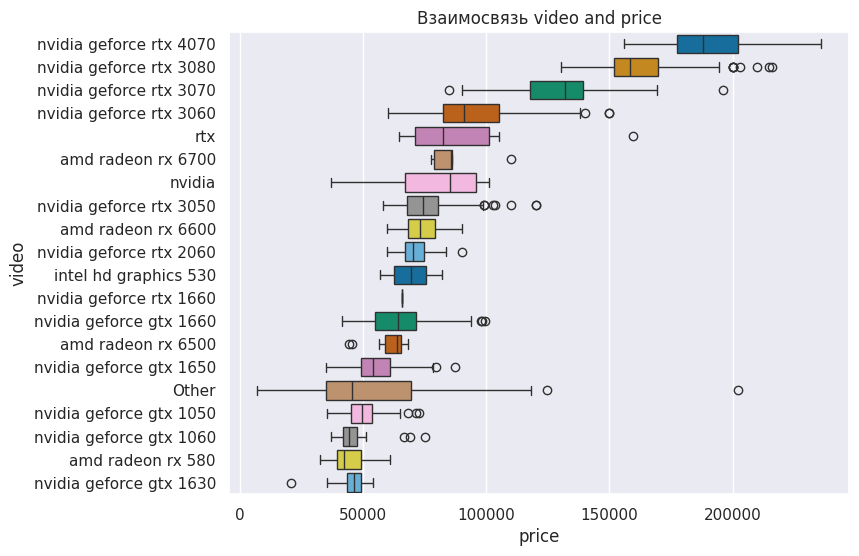

In [ ]:
# видеопроцессор [:20]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y='video', x='price', data=df_pc,
            order=df_pc.groupby('video')['price'].describe().sort_values(by='mean', ascending=False).index[:20], palette='colorblind')
# здесь важно именно среднее арифметическое
plt.title('Взаимосвязь video and price')
plt.show()

In [ ]:
# Видеопроцессор
groups_video = [group['price'].values for name, group in df_pc.groupby('video')]

# Проведение теста Краскела-Уоллиса
h_stat, p_value = kruskal(*groups_video)
print(f"H-статистика: {h_stat}, p-значение: {p_value}")

H-статистика: 1784.636752126182, p-значение: 0.0


За счет большого количества значений график не очень наглядный но влияние на цену видно, также и по статистике p-value равно нулю, а статистики высокое, это говорит о том что видеопроцессор оказывает значительное влияние на цену. Также на графике видно что видеопроцессоры Nvidia geforce rtx наиболее дорогие

### ram_price

<ipython-input-25-5bfb766d92de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_ram', y='price', data=df_pc, palette='colorblind')


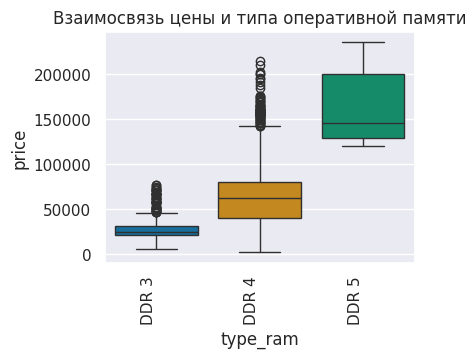

In [ ]:
sns.boxplot(x='type_ram', y='price', data=df_pc, palette='colorblind')
plt.title('Взаимосвязь цены и типа оперативной памяти')
plt.xticks(rotation=90, ha = 'right')
plt.show()

In [ ]:
# Тип оперативной памяти
groups_ram = [group['price'].values for name, group in df_pc.groupby('type_ram')]

# Проведение теста Краскела-Уоллиса
h_stat, p_value = kruskal(*groups_ram)
print(f"H-статистика: {h_stat}, p-значение: {p_value}")

H-статистика: 498.1832744648869, p-значение: 6.620281580794309e-109


p-value очень низкое, а статистики высокое, это говорит о том что оперативная память оказывает значительное влияние на цену

### coutry_price

<ipython-input-26-ce91241eb8bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='price', data=df_pc, palette='colorblind')


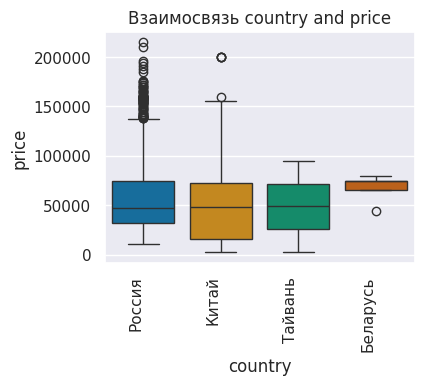

In [ ]:
sns.boxplot(x='country', y='price', data=df_pc, palette='colorblind')
plt.title('Взаимосвязь country and price')
plt.xticks(rotation=90, ha = 'right')
plt.show()

In [ ]:
# Country
groups_country = [group['price'].values for name, group in df_pc.groupby('country')]

# Проведение теста Краскела-Уоллиса
h_stat, p_value = kruskal(*groups_country)
print(f"H-статистика: {h_stat}, p-значение: {p_value}")

H-статистика: 17.50915577643413, p-значение: 0.0005552254120393054


p-value низкое, а статистики высокое, это говорит о том что страна производитель оказывает влияние на цену, но менее значимое чем другие показатели

### os_price

<ipython-input-27-c2a1ad00b869>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='os', x='price', data=df_pc,


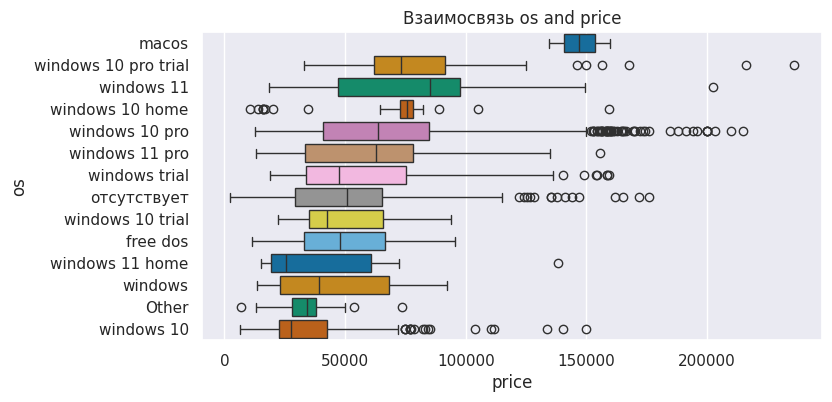

In [ ]:
# os [:15]
f, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(y='os', x='price', data=df_pc,
            order=df_pc.groupby('os')['price'].describe().sort_values(by='mean', ascending=False).index[:15], palette='colorblind')
# здесь важно именно среднее арифметическое
plt.title('Взаимосвязь os and price')
plt.show()

In [ ]:
# os
groups_os = [group['price'].values for name, group in df_pc.groupby('os')]

# Проведение теста Краскела-Уоллиса
h_stat, p_value = kruskal(*groups_os)
print(f"H-статистика: {h_stat}, p-значение: {p_value}")

H-статистика: 463.76253761264115, p-значение: 7.167458835676902e-91


Операционная система также оказывает значительное влияние на цену

## Взаимосвязь категориальных признаков

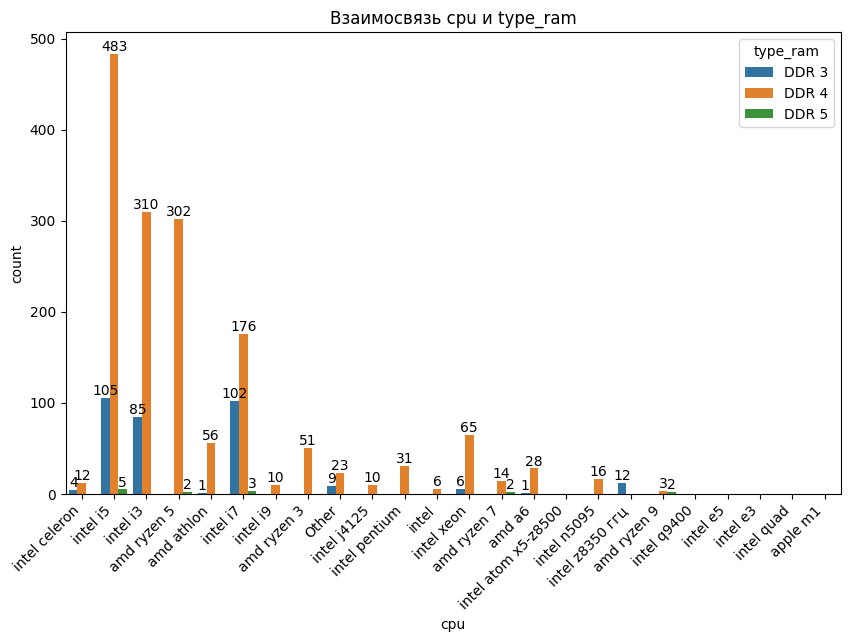

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_pc, x='cpu'[:20], hue='type_ram')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Взаимосвязь cpu и type_ram')
plt.show()

In [ ]:
# Создаем контингентную таблицу
contingency_table = pd.crosstab(df_pc['cpu'], df_pc['type_ram'])
print("\nКонтингентная таблица:")
contingency_table


Контингентная таблица:


type_ram,DDR 3,DDR 4,DDR 5
cpu,,,
amd a6,1,28,0
amd athlon,1,56,0
amd ryzen 3,0,51,0
amd ryzen 5,0,302,2
amd ryzen 7,0,14,2
amd ryzen 9,0,3,2
intel,0,6,0
intel celeron,4,12,0
intel i3,85,310,0


<Axes: xlabel='type_ram', ylabel='cpu'>

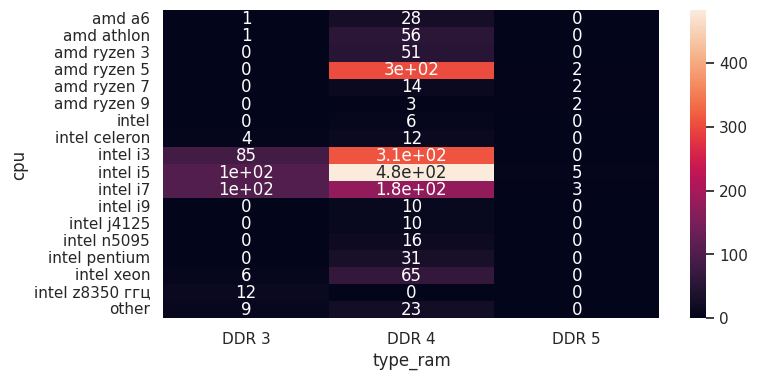

In [ ]:
sns.heatmap(contingency_table,annot=True)

In [ ]:
# Частоты
print("\nЧастоты:")
print(contingency_table)

# Относительные частоты
relative_frequencies = contingency_table / contingency_table.sum().sum()
print("\nОтносительные частоты:")
relative_frequencies


Частоты:
type_ram         DDR 3  DDR 4  DDR 5
cpu                                 
amd a6               1     28      0
amd athlon           1     56      0
amd ryzen 3          0     51      0
amd ryzen 5          0    302      2
amd ryzen 7          0     14      2
amd ryzen 9          0      3      2
intel                0      6      0
intel celeron        4     12      0
intel i3            85    310      0
intel i5           105    483      5
intel i7           102    176      3
intel i9             0     10      0
intel j4125          0     10      0
intel n5095          0     16      0
intel pentium        0     31      0
intel xeon           6     65      0
intel z8350 ггц     12      0      0
other                9     23      0

Относительные частоты:


type_ram,DDR 3,DDR 4,DDR 5
cpu,,,
amd a6,0.000517,0.014470,0.000000
amd athlon,0.000517,0.028941,0.000000
amd ryzen 3,0.000000,0.026357,0.000000
amd ryzen 5,0.000000,0.156072,0.001034
amd ryzen 7,0.000000,0.007235,0.001034
amd ryzen 9,0.000000,0.001550,0.001034
intel,0.000000,0.003101,0.000000
intel celeron,0.002067,0.006202,0.000000
intel i3,0.043928,0.160207,0.000000


In [ ]:
from scipy.stats import chi2_contingency

# Применяем хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square тест:")
print(f"Chi2: {chi2}")
print(f"p-значение: {p}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые частоты:\n{expected}")


Chi-square тест:
Chi2: 397.3082249285901
p-значение: 1.6248707728695236e-63
Степени свободы: 34
Ожидаемые частоты:
[[5.37467700e+00 4.87080103e+00 9.57364341e+00 8.56589147e+00
  5.10594315e+01 2.68733850e+00 8.39793282e-01 1.00775194e+00
  2.68733850e+00 6.63436693e+01 9.95994832e+01 4.71963824e+01
  1.67958656e+00 1.67958656e+00 2.68733850e+00 5.20671835e+00
  1.19250646e+01 2.01550388e+00]
 [2.63937984e+01 2.39193798e+01 4.70139535e+01 4.20651163e+01
  2.50741085e+02 1.31968992e+01 4.12403101e+00 4.94883721e+00
  1.31968992e+01 3.25798450e+02 4.89110078e+02 2.31770543e+02
  8.24806202e+00 8.24806202e+00 1.31968992e+01 2.55689922e+01
  5.85612403e+01 9.89767442e+00]
 [2.31524548e-01 2.09819121e-01 4.12403101e-01 3.68992248e-01
  2.19948320e+00 1.15762274e-01 3.61757106e-02 4.34108527e-02
  1.15762274e-01 2.85788114e+00 4.29043928e+00 2.03307494e+00
  7.23514212e-02 7.23514212e-02 1.15762274e-01 2.24289406e-01
  5.13695090e-01 8.68217054e-02]]


Результаты Chi-square теста

**Chi2** (значение X-квадрат): 397.31
Значительное отклонение наблюдаемых частот от ожидаемых, что указывает на возможную зависимость между признаками.

**p-значение:**
1.63×10 −63

Очень маленькое p-значение подтверждает, что наблюдаемое различие статистически значимо, и нулевая гипотеза о независимости признаков отвергается.

**Степени свободы:** 34
Определяет размерность распределения для теста.

**Ожидаемые частоты:** Показаны для каждой комбинации категорий двух признаков. Эти значения используются для сравнения с фактическими частотами.

**Вывод:** Результаты теста показывают значимую связь между признаками.

Данная связь может оказать влияние при построении множественной модели регрессии

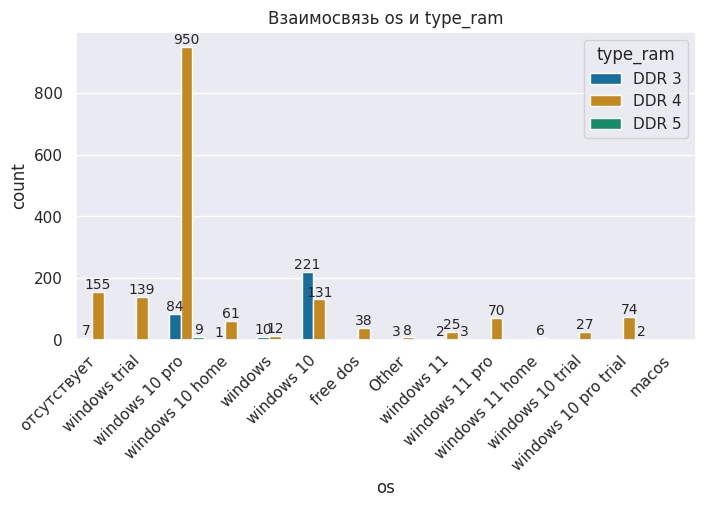

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_pc, x='os', hue='type_ram')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Взаимосвязь os и type_ram')
plt.show()

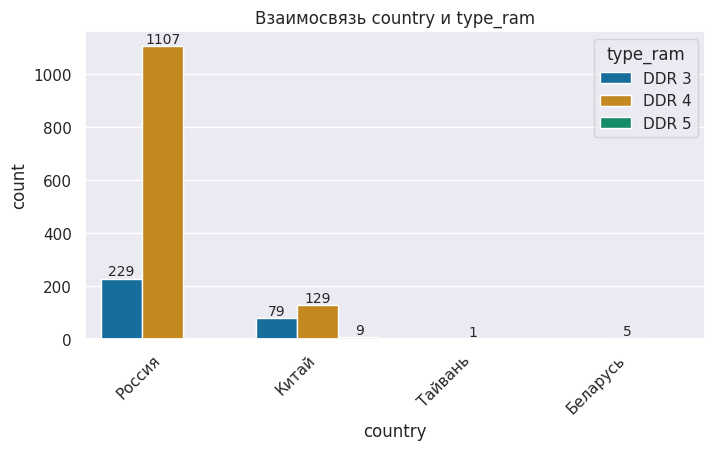

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_pc, x='country', hue='type_ram')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Взаимосвязь country и type_ram')
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 6))
# ax = sns.countplot(data=df_pc, x='cpu'[:20], hue='video')
# ax.bar_label(ax.containers[0], fontsize=10)
# ax.bar_label(ax.containers[1], fontsize=10)
# ax.bar_label(ax.containers[2], fontsize=10)
# plt.xticks(rotation=45, ha='right')
# plt.title('Взаимосвязь cpu и video')
# plt.show()

In [ ]:
# Создаем контингентную таблицу
contingency_table = pd.crosstab(df_pc['video'], df_pc['cpu'])
print("\nКонтингентная таблица:")
contingency_table


Контингентная таблица:


cpu,amd a6,amd athlon,amd ryzen 3,amd ryzen 5,amd ryzen 7,amd ryzen 9,intel,intel atom x5-z8500,intel celeron,intel e3,...,intel i7,intel i9,intel j4125,intel n5095,intel pentium,intel q9400,intel xeon,intel z8350 ггц,intеl quad,other
video,,,,,,,,,,,,,,,,,,,,,
amd radeon r5,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amd radeon rx 550,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
amd radeon rx 570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,1
amd radeon rx 580,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,1
amd radeon rx 6500,0,0,2,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amd radeon rx 6600,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amd radeon rx 6700,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amd radeon vega 3,0,41,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amd radeon vega 7,0,0,0,147,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


<Axes: xlabel='cpu', ylabel='video'>

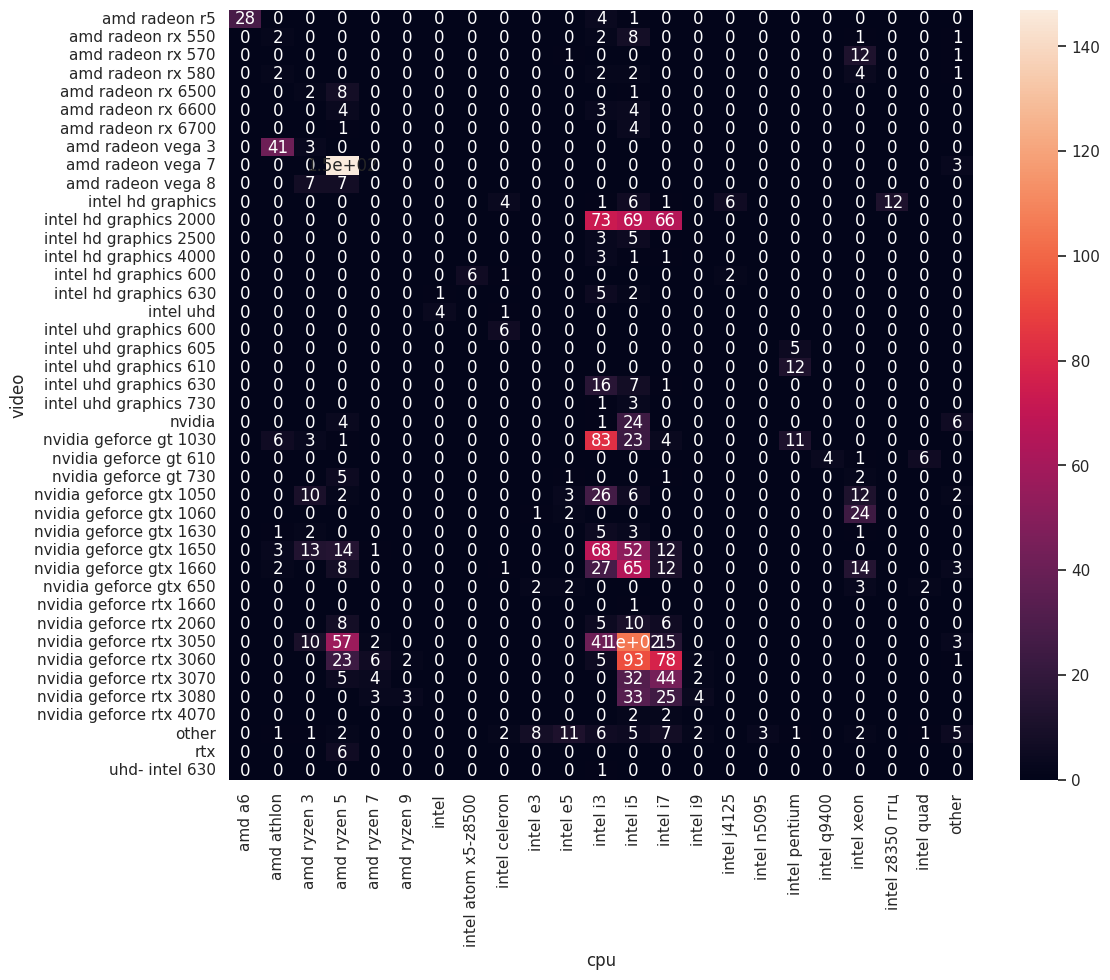

In [ ]:
# отобразим взамодействие процессоров и видеопроцессоров
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(contingency_table,annot=True)

In [ ]:
# cpu video
from scipy.stats import chi2_contingency

# Применяем хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square тест:")
print(f"Chi2: {chi2}")
print(f"p-значение: {p}")
print(f"Степени свободы: {dof}")
 # print(f"Ожидаемые частоты:\n{expected}")


Chi-square тест:
Chi2: 13908.072001616369
p-значение: 0.0
Степени свободы: 902


Процессор и видеопроцессор взаимосвязаны

## Парная регрессия

### cores_price

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import sklearn.linear_model as lm

In [ ]:
LR = lm.LinearRegression()

In [ ]:
# df_cores_price = df_pc[df_pc.cores.notna()]

In [ ]:
# mod1 = LR.fit(df_cores_price[['cores']],df_cores_price[['price']])

In [ ]:
# у меня есть clean_cpu, так как я ранее производил корелляцию
mod1 = LR.fit(clean_cpu[['cores']], clean_cpu[['price']])

In [ ]:
# параметры модели
print(f'intercept(параметр а) {mod1.intercept_}')
print(f'коэффициент {mod1.coef_}')

intercept(параметр а) [43966.7674891]
коэффициент [[2787.20056416]]


In [ ]:
r2 = mod1.score(clean_cpu[['cores']], clean_cpu[['price']])
print(f'коэффициент детерминации {r2}')

коэффициент детерминации 0.103671034928555


Влияние количества ядер на цену примерно десять процентов, сделаем еще один анализ (OLS) метод наименьших квадратов и подробно рассмотрим статистические показатели модели

In [ ]:
results1 = smf.ols('price ~ cores', data=df_pc).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     244.4
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.25e-52
Time:                        05:02:51   Log-Likelihood:                -25029.
No. Observations:                2115   AIC:                         5.006e+04
Df Residuals:                    2113   BIC:                         5.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.397e+04   1317.623     33.368      0.0


**R-squared (R²)**: 0.104 — Модель объясняет только 10.4% изменений в цене, что говорит о её ограниченной способности предсказывать цену.

**Adj. R-squared**: 0.103 — Это значение немного ниже, чем R², и также показывает, что модель не очень хороша в объяснении данных.

**F-statistic**: 244.4 — Показывает, что модель в целом статистически значима и её результаты не случайны.

**Prob (F-statistic)**: 3.25e-52 — Очень маленькое значение указывает, что модель значима и её результаты надёжны.

**Intercept**: 43,970 — Это начальное значение цены, когда переменная "cores" равна нулю.

**cores**: 2,787.20 — Каждое дополнительное ядро (cores) увеличивает цену на 2,787.20, если все остальные факторы остаются постоянными.

**Durbin-Watson**: 0.713 — Указывает на наличие положительной автокорреляции в остатках модели.

**Omnibus и Jarque-Bera**: Оба теста показывают, что остатки модели не распределены нормально.

**Skew**: 0.849 — Остатки имеют положительную асимметрию, что означает, что распределение отклоняется от нормального.

**Kurtosis**: 4.341 — Остатки имеют более острый пик, чем у нормального распределения.

Модель объясняет только небольшую часть изменений в цене, что делает её не очень точной. Остатки модели не распределены нормально, а также есть признаки того, что они зависят друг от друга. В общем, модель не совсем подходит для данных и требует доработки. Данный результат ожидаем так как здесь используется только один фактор влияющий на цену.

### cores_ram_gb

In [ ]:
clean_ram = df_pc[['ram_gb', 'price']].dropna()
# Расчет корреляции Пирсона и p-value
correlation, p_value = stats.pearsonr(clean_ram['ram_gb'], clean_ram['price'])

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.43725824702039934
p-value: 3.359907453804601e-101


In [ ]:
mod1 = LR.fit(clean_ram[['ram_gb']], clean_ram[['price']])
mod1.intercept_, mod1.coef_
r3 = mod1.score(clean_ram[['ram_gb']], clean_ram[['price']])
r3

0.19119477458735257

In [ ]:
results3 = smf.ols('price ~ ram_gb', data=df_pc).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     508.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.36e-101
Time:                        18:35:32   Log-Likelihood:                -25366.
No. Observations:                2152   AIC:                         5.074e+04
Df Residuals:                    2150   BIC:                         5.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.719e+04   1234.573     30.127      0.000    3.48e+04    3.96e+04
ram_gb      1378.4526     61.144     22.544      0.000    1258.544    1498.361
==============================================================================
Omnibus:                      283.424   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.412
Skew:                           0.818   Prob(JB):                    4.08e-121
Kurtosis:                       4.873   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Важно отметить что модель статистически значима и обьясняет 19% цены.



### hdd

In [ ]:
results3 = smf.ols('price ~ hdd', data=df_pc).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     268.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           5.23e-50
Time:                        18:36:46   Log-Likelihood:                -6926.4
No. Observations:                 589   AIC:                         1.386e+04
Df Residuals:                     587   BIC:                         1.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1443.0453   4402.308      0.328      0.743   -7203.146    1.01e+04
hdd           70.8183      4.320     16.394      0.000      62.334      79.303
==============================================================================
Omnibus:                       55.601   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.578
Skew:                           0.637   Prob(JB):                     2.14e-20
Kurtosis:                       4.437   Cond. No.                     3.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept (константа): p-value = 0.743 — Это значение значительно больше 0.05, что говорит о том, что константа статистически незначима. Это означает, что её влияние на цену не является статистически значимым.

hdd: p-value < 0.001 — Это значение значительно меньше 0.05, что говорит о том, что переменная "hdd" статистически значима и её влияние на цену значительное.

В общем, переменная "hdd" имеет значительное влияние на цену, но константа модели не является статистически значимой. Модель объясняет 31.4% изменений в цене и может нуждаться в доработке, особенно из-за возможной автокорреляции остатков.

In [ ]:
results3 = smf.ols('price ~ ssd', data=df_pc).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     186.1
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.33e-37
Time:                        18:46:34   Log-Likelihood:                -7551.6
No. Observations:                 639   AIC:                         1.511e+04
Df Residuals:                     637   BIC:                         1.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.793e+04   2573.660     14.738      0.000    3.29e+04     4.3e+04
ssd           81.1690      5.950     13.642      0.000      69.485      92.853
==============================================================================
Omnibus:                       30.872   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.560
Skew:                           0.521   Prob(JB):                     3.13e-08
Kurtosis:                       3.462   Cond. No.                         856.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В парной регрессии этот показатель значим,
коэффициент детерминации 0.226, pvalue близко к нулю



### **- Категориальные признаки**

### cpu

In [ ]:
results4 = smf.ols(f'price ~ cpu', data=df_pc).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     50.97
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          1.85e-181
Time:                        18:47:23   Log-Likelihood:                -23837.
No. Observations:                2040   AIC:                         4.772e+04
Df Residuals:                    2016   BIC:                         4.786e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    4.25e+04   4690.182      9.062      0.000    3.33e+04    5.17e+04
cpu[T.amd a6]              -1.908e+04   7128.992     -2.676      0.008   -3.31e+04   -5099.559
cpu[T.amd athlon]          -1.039e+04   6034.084     -1.722      0.085   -2.22e+04    1443.861
cpu[T.amd ryzen 3]          5733.3225   6195.832      0.925      0.355   -6417.580    1.79e+04
cpu[T.amd ryzen 5]          1.399e+04   4972.883      2.814      0.005    4238.718    2.37e+04
cpu[T.amd ryzen 7]          7.956e+04   8616.415      9.234      0.000    6.27e+04    9.65e+04
cpu[T.amd ryzen 9]          1.356e+05   1.38e+04      9.862      0.000    1.09e+05    1.63e+05
cpu[T.apple m1]             1.046e+05    2.1e+04      4.986      0.000    6.35e+04    1.46e+05
cpu[T.intel]               -1.423e+04   8616.415     -1.652      0.099   -3.11e+04    2664.662
cpu[T.intel atom x5-z8500] -3.244e+04   1.27e+04     -2.554      0.011   -5.73e+04   -7527.224
cpu[T.intel celeron]       -1.813e+04   7277.203     -2.492      0.013   -3.24e+04   -3862.070
cpu[T.intel e3]             1.215e+04   9899.002      1.228      0.220   -7260.455    3.16e+04
cpu[T.intel e5]             2.136e+04   7987.092      2.674      0.008    5694.525     3.7e+04
cpu[T.intel i3]             1366.8806   4906.327      0.279      0.781   -8255.120     1.1e+04
cpu[T.intel i5]             2.965e+04   4836.906      6.131      0.000    2.02e+04    3.91e+04
cpu[T.intel i7]             4.593e+04   4997.259      9.190      0.000    3.61e+04    5.57e+04
cpu[T.intel i9]             1.145e+05   1.03e+04     11.147      0.000    9.44e+04    1.35e+05
cpu[T.intel j4125]         -2.537e+04   9899.002     -2.562      0.010   -4.48e+04   -5952.407
cpu[T.intel n5095]         -2.621e+04   8616.415     -3.042      0.002   -4.31e+04   -9314.088
cpu[T.intel pentium]       -1.148e+04   6997.347     -1.641      0.101   -2.52e+04    2240.613
cpu[T.intel q9400]         -1.287e+04   1.27e+04     -1.014      0.311   -3.78e+04     1.2e+04
cpu[T.intel xeon]            503.9265   5731.829      0.088      0.930   -1.07e+04    1.17e+04
cpu[T.intel z8350 ггц]     -3.501e+04   9573.794     -3.656      0.000   -5.38e+04   -1.62e+04
cpu[T.intеl quad]          -1.234e+04   1.03e+04     -1.201      0.230   -3.25e+04    7810.392
==============================================================================
Omnibus:                      205.605   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.467
Skew:                           0.606   Prob(JB):                    1.39e-101
Kurtosis:                       4.999   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the 

Как мы видим в данной модели много незначимых коэффициентов. Создадим дополнительный столбец для модели регрессии и в функции с помощью цикла оставим в нем только значимые категории. Тоже сделаем для видео, а далее применим для множественной регрессии.

In [ ]:
######## while cpu

In [ ]:
df_pc['cpu_cat'] = df_pc['cpu']
df_pc['cpu_cat']

<ipython-input-193-43b2fd93c32b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu']


,cpu_cat
0,intel celeron
1,intel i5
2,NaN
3,intel i5
4,intel i5
...,...
3990,intel i3
3991,intel i3
3994,intel i5
3999,intel i5


In [ ]:
model = smf.ols(f'price ~ cpu_cat', data=df_pc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     24.56
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.37e-167
Time:                        19:46:26   Log-Likelihood:                -23822.
No. Observations:                2040   AIC:                         4.774e+04
Df Residuals:                    1990   BIC:                         4.803e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

В данной модели много незначимых категорий, пройдем циклом удаляя самый незначимый и посмотрим что получистя

In [ ]:
# в цикле будем находить и удалять незначимые коэффициенты
# в случае успешного решения оценим модель
def pass_cpu3(x):
  if x == str(model.pvalues[1:].idxmax()[10:-1]):
    return np.nan
  else:
    return x

while True:
  model = smf.ols(f'price ~ cpu_cat', data=df_pc).fit()
  max_p_value = model.pvalues[1:].max()
  print(max_p_value, model.pvalues.idxmax())
  if max_p_value > 0.050: # and model.pvalues.idxmax() != 'Intercept':
    df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)

  else:
    print(model.summary())
    break

0.9299512008381206 cpu_cat[T.intel xeon]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.7844543418549288 cpu_cat[T.intel i3]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.401614541408832 cpu_cat[T.amd ryzen 3]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.36481772285981895 cpu_cat[T.intel q9400]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.2837754989009776 cpu_cat[T.intеl quad]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.2746838114602431 cpu_cat[T.intel e3]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.14548571110820618 cpu_cat[T.intel pentium]
0.14678684159310845 cpu_cat[T.intel]


<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)
<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


0.13195158768506507 cpu_cat[T.amd athlon]
0.032629512702644435 cpu_cat[T.intel celeron]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     40.02
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.13e-91
Time:                        20:09:22   Log-Likelihood:                -16301.
No. Observations:                1377   AIC:                         3.263e+04
Df Residuals:                    1362   BIC:                         3.271e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

<ipython-input-248-83deb008b446>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['cpu_cat'] = df_pc['cpu_cat'].apply(pass_cpu3)


Модель линейной регрессии объясняет 29% вариации цены, что указывает на приемлемую объяснительную способность. Значение F-статистики 40 и его низкий p-value свидетельствуют о высокой статистической значимости модели в целом.

Все оставшиеся коэффициенты значимы (p-value < 0.05), что подтверждает их влияние на цену. Однако остатки модели показывают возможную автокорреляцию (Durbin-Watson = 0.718) и отклонение от нормальности (значимые тесты Omnibus и Jarque-Bera). Это может указывать на необходимость доработки модели для улучшения её качества и устранения возможных проблем.

### video

In [ ]:
df_pc.shape

(2165, 12)

In [ ]:
# Построим подобную модель для видеопроцессоров

In [ ]:
df_pc['video_cat'] = df_pc['video']
df_pc['video_cat']

<ipython-input-196-b06abcb81a5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video']


,video_cat
0,intel hd graphics
1,NaN
2,NaN
3,intel uhd graphics 630
4,nvidia geforce gtx 1660
...,...
3990,intel hd graphics 2000
3991,intel hd graphics 2000
3994,nvidia geforce rtx 3060
3999,nvidia


In [ ]:
model = smf.ols(f'price ~ video_cat', data=df_pc).fit()
model.pvalues[1:]

,0
video_cat[T.amd radeon r5],7.757969e-25
video_cat[T.amd radeon rx 550],8.831204e-04
video_cat[T.amd radeon rx 570],1.621353e-02
video_cat[T.amd radeon rx 580],3.977419e-02
video_cat[T.amd radeon rx 6500],6.376682e-02
video_cat[T.amd radeon rx 6600],3.092404e-07
video_cat[T.amd radeon rx 6700],1.685552e-09
video_cat[T.amd radeon vega 3],9.100067e-21
video_cat[T.amd radeon vega 7],4.243125e-12
video_cat[T.amd radeon vega 8],9.636610e-09


In [ ]:
def pass_video3(x):
  if x == str(model.pvalues[1:].idxmax()[12:-1]):
    return np.nan
  else:
    return x

while True:
  model = smf.ols(f'price ~ video_cat', data=df_pc).fit()
  max_p_value = model.pvalues[1:].max()
  print(max_p_value, model.pvalues.idxmax())
  if max_p_value > 0.050: # and model.pvalues.idxmax() != 'Intercept':
    df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)

  else:
    print(model.summary())
    break

0.29984301841048505 video_cat[T.nvidia geforce rtx 1660]


<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


0.17719008705466313 video_cat[T.nvidia geforce gtx 1050]


<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


0.16405643530580555 video_cat[T.nvidia geforce gtx 1650]


<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


0.07167715485665728 video_cat[T.amd radeon rx 6500]


<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


0.05936181045668752 video_cat[T.uhd- intel 630]


<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


0.05278433207945063 video_cat[T.nvidia geforce gtx 650]
0.04652444781790147 video_cat[T.amd radeon rx 580]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     378.1
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:09:45   Log-Likelihood:                -19259.
No. Observations:                1773   AIC:                         3.859e+04
Df Residuals:                    1736   BIC:                         3.879e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975

<ipython-input-249-ea783c3baeb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['video_cat'] = df_pc['video_cat'].apply(pass_video3)


Данная модель также значима, необходимо будет проверить влияние данных факторов во множественной можели

### os

In [ ]:
model_os = smf.ols(f'price ~ os', data=df_pc).fit()
model_os.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     31.41
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           4.53e-72
Time:                        19:01:17   Log-Likelihood:                -25562.
No. Observations:                2165   AIC:                         5.115e+04
Df Residuals:                    2151   BIC:                         5.123e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.471e+04   7900.058      4.394      0.000    1.92e+04    5.02e+04
os[T.free dos]              1.542e+04   9363.358      1.647      0.100   -2938.963    3.38e+04
os[T.macos]                 1.124e+05   2.43e+04      4.615      0.000    6.46e+04     1.6e+05
os[T.windows]               9923.4419   9331.935      1.063      0.288   -8377.111    2.82e+04
os[T.windows 10]            -235.4945   8081.447     -0.029      0.977   -1.61e+04    1.56e+04
os[T.windows 10 home]       3.541e+04   8917.600      3.971      0.000    1.79e+04    5.29e+04
os[T.windows 10 pro]        3.447e+04   7963.997      4.328      0.000    1.89e+04    5.01e+04
os[T.windows 10 pro trial]  4.765e+04   8739.065      5.453      0.000    3.05e+04    6.48e+04
os[T.windows 10 trial]      1.589e+04   1.01e+04      1.575      0.115   -3889.683    3.57e+04
os[T.windows 11]            4.407e+04   9396.202      4.690      0.000    2.56e+04    6.25e+04
os[T.windows 11 home]       1.443e+04   1.55e+04      0.933      0.351   -1.59e+04    4.48e+04
os[T.windows 11 pro]        2.541e+04   8515.606      2.984      0.003    8709.884    4.21e+04
os[T.windows trial]         2.391e+04   8369.224      2.857      0.004    7498.646    4.03e+04
os[T.отсутствует]           2.051e+04   8240.646      2.488      0.013    4344.930    3.67e+04
==============================================================================
Omnibus:                      492.867   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1078.984
Skew:                           1.288   Prob(JB):                    5.03e-235
Kurtosis:                       5.307   Cond. No.                         51.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В данной категории многие коэффициенты не значимы, её мы не будем включать в модель множественной регрессии, но в целом она также оказывает влияние на цену

### type ram

In [ ]:
model_ram = smf.ols(f'price ~ type_ram', data=df_pc).fit()
model_ram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     254.3
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.66e-99
Time:                        19:02:39   Log-Likelihood:                -24022.
No. Observations:                2038   AIC:                         4.805e+04
Df Residuals:                    2035   BIC:                         4.807e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.959e+04   1758.701     16.827      0.000    2.61e+04     3.3e+04
type_ram[T.DDR 4]  3.696e+04   1921.252     19.237      0.000    3.32e+04    4.07e+04
type_ram[T.DDR 5]  1.315e+05   8692.426     15.129      0.000    1.14e+05    1.49e+05
==============================================================================
Omnibus:                      430.655   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              879.420
Skew:                           1.231   Prob(JB):                    1.09e-191
Kurtosis:                       5.072   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

все коэффициенты значимы, включаем в модель

### country

In [ ]:
model_c = smf.ols(f'price ~ country', data=df_pc).fit()
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.200
Date:                Tue, 13 Aug 2024   Prob (F-statistic):             0.0863
Time:                        19:03:42   Log-Likelihood:                -19835.
No. Observations:                1665   AIC:                         3.968e+04
Df Residuals:                    1661   BIC:                         3.970e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.767e+04   1.62e+04      4.187      0.000     3.6e+04    9.94e+04
country[T.Китай]   -1.559e+04   1.63e+04     -0.955      0.340   -4.76e+04    1.64e+04
country[T.Россия]  -9463.0064   1.62e+04     -0.584      0.559   -4.12e+04    2.23e+04
country[T.Тайвань] -1.882e+04   3.02e+04     -0.623      0.534   -7.81e+04    4.05e+04
==============================================================================
Omnibus:                      405.718   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.489
Skew:                           1.411   Prob(JB):                    2.28e-182
Kurtosis:                       5.023   Cond. No.                         54.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В данной категории коэффициенты по всем странам не значимые, не включаем во множетвенную регрессию

In [ ]:
# df_pc.to_csv('df_pc.csv', index=False)

## 4.2 Множественная регрессия (OLS)

In [ ]:
######################################
# intercept - свободный член (параметр а)
# coef - коэффициент перед признаком
# R-squared - коэффициент детерминайции (на эту долю фактор флияет на целевой)
# Adj. R-squared - скорректированный коэффициент
# F-statistic - статистика Фишера для проверки общей неадекватности модели(Prob(F-statistic)) - p-value для этой статистики, если меньше 0, гипотеза о неадекватности отклоняется
# t - статистика Стьюдента, если меньше критического значения, коэффициент незначимый
# p-value - можно обойтись им
# Durbin-Watson - если близко к 0 прямая кореляция, к 4 обратная, около 2 нет
# skew - коэффициент ассиметрии
# kurtosis - коэффициент эксцесса (здесь сравнивать с 3)
# Jarque-Bera (JB) - проверка соответствия Гауссовскому закону, если больше 0 распределение нормальное

Применим факторы оказывающие наибольшее влияние на цену

In [ ]:
# построим модель и посмотрим значения
# model = smf.ols(f'price ~ cores + ram_gb + hdd + ssd + ram_cat + cpu_cat + video_cat', data=df_pc1).fit()

In [ ]:
df_pc['ram_cat'] = df_pc['type_ram']
df_pc['cpu_cat'] = df_pc['cpu']
df_pc['video_cat'] = df_pc['video']

для модели созданы столбцы с суффиксом _cat для категориальных данных, в процессе работы модель удалит оттудата наименее значимые категории

In [ ]:
# возьмем срез регрессии для удаления значений с максимальным pvalue
# index[1:] исключим intercept
def pass_3(x):
  # print('xxx: ', x)
  if x == str(model.pvalues[1:].idxmax()[len(column)+3:-1]):
    x = np.nan
    return x
  else:
    return x

while True:
  # model = smf.ols(f'price ~ cores + ram_gb + hdd + ssd + ram_cat + cpu_cat + video_cat', data=df_pc1).fit()
  model = smf.ols(f'price ~ cores + ram_gb + hdd + ssd + video_cat', data=df_pc).fit()
  # f = re.search(r'(\b.*)\[', resultsm.pvalues.idxmax())
  # column = f.group()[:-1]
  max_p_value = model.pvalues[1:].max()
  max_name = model.pvalues[1:].idxmax()
  if max_name in ['cores', 'ram_gb', 'hdd', 'ssd']:
    print(f'exclude: {max_name}!')
    break

  print(max_p_value, max_name)
  if max_p_value > 0.050: # and model.pvalues.idxmax() != 'Intercept':

    f = re.search(r'(\b.*)\[', max_name)
    column = f.group()[:-1]
    #print(df_pc[f'{column}'])
    df_pc[f'{column}'] = df_pc[f'{column}'].apply(pass_3)

  else:
    print(model.summary())
    break

0.7274834253200517 video_cat[T.intel hd graphics 4000]
0.6787128255770425 video_cat[T.nvidia geforce rtx 2060]
0.7176353861287535 video_cat[T.intel uhd graphics 610]
0.5630777089516255 video_cat[T.nvidia geforce rtx 1660]
0.8741612469205672 video_cat[T.intel uhd graphics 730]
0.9993451188571352 video_cat[T.intel uhd]
0.533049363100891 video_cat[T.amd radeon rx 6500]
0.3799925939191292 video_cat[T.amd radeon rx 550]
0.8086375125208154 video_cat[T.intel hd graphics 530]
0.9438252224135383 video_cat[T.intel hd graphics 2500]
0.7276659222770183 video_cat[T.intel hd graphics 600]
0.6474584207969034 video_cat[T.nvidia geforce gt 610]
0.6631307510862461 video_cat[T.amd radeon vega 3]
0.48819524556901395 video_cat[T.amd radeon r5]
0.9107102986886616 video_cat[T.amd radeon rx 580]
0.831393813167447 video_cat[T.nvidia geforce rtx 4070]
0.16376283239585115 video_cat[T.rtx]
0.4487995446962326 video_cat[T.uhd- intel 630]
0.8405671461305655 video_cat[T.intel uhd graphics 605]
0.9252540245021887 vide

В результате тестов установленоб что получается наиболее адекватная модель регрессии если не включить тип процессора и оперативной памяти. Также исключены многие категориальные показатели типа видеопроцессора, т.е. оставлены только наиболее значимые показатели и они неплохо описывают модель регрессии.

1. Коэффициент детерминации (R-squared и Adj. R-squared)
R-squared: 0.917
Adj. R-squared: 0.913
Коэффициент детерминации R2 показывает, что модель объясняет около 91.7% вариации зависимой переменной (цены). Это означает, что модель хорошо справляется с объяснением изменчивости данных.

Корректированный коэффициент детерминации (Adj. R-squared) также высок — 91.3%, что указывает на то, что модель хорошо описывает данные даже с учетом количества предикторов.

2. F-статистика и ее значимость
F-статистика: 263.1
Prob (F-статистика): 3.10e-267
Высокая F-статистика с крайне низким значением p-value (близким к нулю) свидетельствует о значимости модели в целом. Это означает, что хотя бы один из предикторов существенно связан с зависимой переменной (ценой).

3. Коэффициенты предикторов и их значимость
Каждый коэффициент оценивает влияние соответствующего предиктора на зависимую переменную (цену). В  данной модели все значения с p-value < 0.05, что говорит о их статистической значимости. Например:

Количество ядер (cores): коэффициент 631.12 указывает на увеличение цены на 631.12 единиц при увеличении числа ядер на 1, при прочих равных условиях.
RAM (ram_gb): коэффициент 297.74 показывает увеличение цены на 297.74 единицы при увеличении объема оперативной памяти на 1 ГБ.
SSD: увеличение на 29.10 единиц при увеличении объема SSD на 1 ГБ.

4. Диагностика модели
Omnibus: 285.005, Prob(Omnibus): 0.000
Jarque-Bera (JB): 7672.737, Prob(JB): 0.00
Skew: 1.709
Kurtosis: 20.993
Показатели Omnibus и Jarque-Bera (JB) с нулевым p-value указывают на то, что остатки модели не распределены нормально. Skew (асимметрия) показывает, что распределение остатков смещено вправо. Высокое значение Kurtosis (эксцесс) также свидетельствует о наличии экстремальных значений (выбросов).

Durbin-Watson: 1.573
Коэффициент Durbin-Watson близок к 2, что указывает на отсутствие значимой автокорреляции остатков.

5. Заключение
Модель в целом адекватно описывает зависимость цены от предикторов, что подтверждается высоким R2 и значимостью модели по F-статистике. Однако наличие выбросов и ненормальность остатков (судя по тестам Omnibus и Jarque-Bera) могут указывать на возможность улучшения модели за счет дополнительных трансформаций данных или применения других методов регрессии.

# 5 Анализ популярности

### sales

In [ ]:
df2.sort_values(by='sales', ascending=False).head(10)

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
714,90081446,Блок питания 12вольт 2 ампер Сетевой блок,232,5200.0,272.0,NaN,отсутствует,0,Китай,NaN,NaN,NaN,NaN,NaN,NaN
1694,142153356,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,32900,800.0,80.0,nvidia geforce gt 730,windows,730,NaN,NaN,512.0,intel i7,4.0,DDR 3,16.0
97,43240828,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,800.0,3.0,Other,отсутствует,1095,Россия,NaN,NaN,intel pentium,2.0,DDR 4,4.0
66,25968600,Игровой Компьютер Robotcomp Старт V1,30760,500.0,148.0,nvidia geforce gt 1030,windows trial,1095,Россия,NaN,NaN,intel i3,4.0,DDR 4,8.0
1650,140001995,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,20400,500.0,279.0,intel hd graphics,windows,730,NaN,NaN,256.0,intel i5,4.0,DDR 3,8.0
25,20904019,Игровой Компьютер Robotcomp Аллигатор V3,34017,500.0,128.0,amd radeon vega 7,windows 10 pro,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
738,93548269,Игровой компьютер Life Tech Bastion,25989,400.0,189.0,nvidia geforce gt 1030,windows 10 pro,1095,Россия,NaN,NaN,intel i5,2.0,DDR 3,8.0
24,20904018,Игровой Компьютер Robotcomp Аллигатор V2,32617,400.0,101.0,amd radeon vega 7,windows 10 pro,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
424,65369801,Игровой компьютер Roo24 x4 950 GT1030V1,29992,300.0,89.0,nvidia geforce gt 1030,windows 10 pro,1095,Россия,NaN,NaN,amd athlon,4.0,DDR 4,8.0


In [ ]:
df2.groupby('cpu')['sales'].describe().sort_values(by='max', ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
cpu,,,,,,,,
intel pentium,19.0,47.368421,182.264829,5.0,5.0,5.0,5.0,800.0
intel i7,103.0,16.019417,79.036351,5.0,5.0,5.0,5.0,800.0
amd ryzen 5,147.0,22.721088,60.918290,5.0,5.0,5.0,10.0,500.0
intel i3,167.0,15.269461,42.206668,5.0,5.0,5.0,10.0,500.0
intel i5,254.0,14.881890,44.221257,5.0,5.0,5.0,5.0,500.0
intel celeron,14.0,45.714286,105.171237,5.0,5.0,10.0,25.0,400.0
amd athlon,38.0,21.578947,50.845623,5.0,5.0,5.0,10.0,300.0
amd a6,25.0,27.000000,60.690472,5.0,5.0,5.0,10.0,300.0
Other,17.0,19.117647,47.375999,5.0,5.0,5.0,5.0,200.0


В топе продаж блок питания, а если группировать по процессорам, то intel pentium

### feedbacks

In [ ]:
df2.sort_values(by='feedbacks', ascending=False).head(10)

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
2158,143753759,Игровой Компьютер Robotcomp Аллигатор V1,31722,5.0,296.0,amd radeon vega 7,windows trial,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
694,88538598,Игровой Компьютер Robotcomp Аллигатор V1,30628,200.0,296.0,amd radeon vega 7,windows trial,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
2214,144314252,Системный блок ПК i7-2600 16 Гб SSD 512 Гб,29000,5.0,279.0,intel hd graphics,windows,730,NaN,NaN,512.0,intel i5,4.0,DDR 3,16.0
1650,140001995,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,20400,500.0,279.0,intel hd graphics,windows,730,NaN,NaN,256.0,intel i5,4.0,DDR 3,8.0
2215,144314539,Системный блок ПК i5-2400 16 Гб SSD 512 Гб,24000,40.0,279.0,intel hd graphics,windows,730,NaN,NaN,512.0,intel i5,4.0,DDR 3,16.0
2213,144313506,Системный блок ПК i5-2400 16 Гб SSD 256 Гб,22500,10.0,279.0,intel hd graphics,windows,730,NaN,NaN,256.0,intel i5,4.0,DDR 3,16.0
714,90081446,Блок питания 12вольт 2 ампер Сетевой блок,232,5200.0,272.0,NaN,отсутствует,0,Китай,NaN,NaN,NaN,NaN,NaN,NaN
2219,144494116,Временно недоступен,2884,40.0,235.0,NaN,отсутствует,0,Китай,NaN,NaN,NaN,NaN,NaN,NaN
2220,144494121,Временно недоступен,2884,60.0,235.0,NaN,отсутствует,0,Китай,NaN,NaN,NaN,NaN,NaN,NaN
981,101735206,Игровой компьютер Life Tech Bastion,25500,100.0,189.0,nvidia geforce gt 1030,windows 10 pro,1095,Россия,NaN,NaN,intel i5,2.0,DDR 3,8.0


In [ ]:
df2.groupby('cpu')['feedbacks'].describe().sort_values(by='max', ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
cpu,,,,,,,,
amd ryzen 5,496.0,5.608871,24.820980,0.0,0.0,0.0,1.00,296.0
intel i5,1160.0,2.624138,19.569352,0.0,0.0,0.0,0.00,279.0
intel i3,521.0,3.374280,16.031940,0.0,0.0,0.0,0.00,148.0
Other,41.0,6.146341,25.431831,0.0,0.0,0.0,1.00,117.0
amd athlon,121.0,3.859504,14.749184,0.0,0.0,0.0,1.00,89.0
intel i7,699.0,0.941345,7.118179,0.0,0.0,0.0,0.00,80.0
intel xeon,77.0,1.792208,9.347583,0.0,0.0,0.0,0.00,77.0
amd a6,47.0,5.085106,13.728469,0.0,0.0,0.0,4.00,66.0
intel,17.0,2.176471,5.637323,0.0,0.0,0.0,2.00,23.0


In [ ]:
top_10 = df2.sort_values(by=['sales', 'feedbacks'], ascending=False).head(10)
top_10

,product_id,title,price,sales,feedbacks,video,os,guarantee,country,hdd,ssd,cpu,cores,type_ram,ram_gb
714,90081446,Блок питания 12вольт 2 ампер Сетевой блок,232,5200.0,272.0,NaN,отсутствует,0,Китай,NaN,NaN,NaN,NaN,NaN,NaN
1694,142153356,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,32900,800.0,80.0,nvidia geforce gt 730,windows,730,NaN,NaN,512.0,intel i7,4.0,DDR 3,16.0
97,43240828,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,800.0,3.0,Other,отсутствует,1095,Россия,NaN,NaN,intel pentium,2.0,DDR 4,4.0
1650,140001995,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,20400,500.0,279.0,intel hd graphics,windows,730,NaN,NaN,256.0,intel i5,4.0,DDR 3,8.0
66,25968600,Игровой Компьютер Robotcomp Старт V1,30760,500.0,148.0,nvidia geforce gt 1030,windows trial,1095,Россия,NaN,NaN,intel i3,4.0,DDR 4,8.0
25,20904019,Игровой Компьютер Robotcomp Аллигатор V3,34017,500.0,128.0,amd radeon vega 7,windows 10 pro,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
738,93548269,Игровой компьютер Life Tech Bastion,25989,400.0,189.0,nvidia geforce gt 1030,windows 10 pro,1095,Россия,NaN,NaN,intel i5,2.0,DDR 3,8.0
24,20904018,Игровой Компьютер Robotcomp Аллигатор V2,32617,400.0,101.0,amd radeon vega 7,windows 10 pro,1095,Россия,NaN,NaN,amd ryzen 5,6.0,DDR 4,16.0
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,7.0,intel hd graphics,отсутствует,1095,Россия,NaN,NaN,intel celeron,2.0,DDR 3,4.0
424,65369801,Игровой компьютер Roo24 x4 950 GT1030V1,29992,300.0,89.0,nvidia geforce gt 1030,windows 10 pro,1095,Россия,NaN,NaN,amd athlon,4.0,DDR 4,8.0


В топе отзывов Игровой Компьютер Robotcomp М16 2.0 V1 и процессор amd ryzen 5

# Выводы

Наибольшее влияние на цену оказывает Процессор, видеопроцессор, оперативная память, жесткий диск и операционная система.

На основании модели регрессии мы можем прогнозировать цену на основании комплектующих.


На основании топ sales и feedbacks можно составить советы по оптимальным характеристикам для сборки востребованных компьютеров, а с помощью множественной регрессии рекомендации по ценовой политике и маркетингу для успешного выхода на онлайн-рынок.

## Модель

In [ ]:
rp = model.params

Построим пробную модель и как видим для такой сборки цена адекватная

In [ ]:
# 'hdd + ssd + cpu + cores + video + type_ram + ram_gb + (os)'
predicted_price = rp['Intercept']

data = {
    'cpu': 'intel i5',
    'cores': 4,
    'type_ram': 'DDR 4',
    'ram_gb': 16,
    # 'os': 'windows 10 pro',
    'ssd': 512,
    'video': 'nvidia geforce gt 1030'}

ssd_key = f"ssd[T.{data['ssd']}]"
if ssd_key in rp:
    predicted_price += rp[ssd_key]

cpu_key = f"cpu_cat[T.{data['cpu']}]"
if cpu_key in rp:
    predicted_price += rp[cpu_key]

cores_key = f"cores[T.{data['cores']}]"
if cores_key in rp:
    predicted_price += rp[cores_key]

video_key = f"video_cat[T.{data['video']}]"
if video_key in rp:
    predicted_price += rp[video_key]

ram_key = f"ram_cat[T.{data['type_ram']}]"
if ram_key in rp:
    predicted_price += rp[ram_key]

gb_key = f"ram_gb[T.{data['ram_gb']}]"
if gb_key in rp:
    predicted_price += rp[gb_key]

# os_key = f"os[T.{data['os']}]"
# if os_key in rp:
#     predicted_price += rp[os_key]

print(f"Прогнозируемая цена: {predicted_price:.2f}")

Прогнозируемая цена: 38750.97


## Топ популярных товаров

В топе самых популярных блок питания, построим топ 5 по копьютерам

### Топ популярных комплектующих

In [ ]:
# Процессор топ 5
top_5_cpu = df2.groupby('cpu')['sales'].describe().sort_values(by='max', ascending=False)[:5]
top_5_cpu.to_excel('top5_cpu.xlsx', index=True)
top_5_cpu

,count,mean,std,min,25%,50%,75%,max
cpu,,,,,,,,
intel pentium,19.0,47.368421,182.264829,5.0,5.0,5.0,5.0,800.0
intel i7,103.0,16.019417,79.036351,5.0,5.0,5.0,5.0,800.0
intel i3,167.0,15.269461,42.206668,5.0,5.0,5.0,10.0,500.0
amd ryzen 5,147.0,22.721088,60.918290,5.0,5.0,5.0,10.0,500.0
intel i5,254.0,14.881890,44.221257,5.0,5.0,5.0,5.0,500.0


In [ ]:
# Процессор топ 5
top_5_cpu_f = df2.groupby('cpu')['feedbacks'].describe().sort_values(by='max', ascending=False)[:5]
top_5_cpu_f.to_excel('top5_cpu_f.xlsx', index=True)
top_5_cpu_f

,count,mean,std,min,25%,50%,75%,max
cpu,,,,,,,,
amd ryzen 5,496.0,5.608871,24.820980,0.0,0.0,0.0,1.0,296.0
intel i5,1160.0,2.624138,19.569352,0.0,0.0,0.0,0.0,279.0
intel i3,521.0,3.374280,16.031940,0.0,0.0,0.0,0.0,148.0
other,41.0,6.146341,25.431831,0.0,0.0,0.0,1.0,117.0
amd athlon,121.0,3.859504,14.749184,0.0,0.0,0.0,1.0,89.0


In [ ]:
# Видеопроцессор топ 5
top_5_video = df2.groupby('video')['feedbacks'].describe().sort_values(by='max', ascending=False)[:5]
top_5_video.to_excel('top5_video.xlsx', index=True)
top_5_video

,count,mean,std,min,25%,50%,75%,max
video,,,,,,,,
amd radeon vega 7,212.0,12.599057,37.540936,0.0,0.0,0.0,5.00,296.0
intel hd graphics,30.0,38.300000,96.077609,0.0,0.0,0.0,3.25,279.0
nvidia geforce gt 1030,197.0,11.609137,32.687833,0.0,0.0,0.0,2.00,189.0
amd radeon vega 8,14.0,9.500000,31.025424,0.0,0.0,0.0,1.00,117.0
nvidia geforce gtx 1660,275.0,2.741818,11.699502,0.0,0.0,0.0,0.00,94.0


In [ ]:
# Операционная система топ 10
df2.groupby('os')['sales'].describe().sort_values(by='max', ascending=False)[1:11]

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
windows,17.0,85.588235,219.145231,5.0,5.00,5.0,20.00,800.0
windows 10 pro,488.0,15.471311,41.340267,5.0,5.00,5.0,10.00,500.0
windows trial,92.0,30.000000,69.420680,5.0,5.00,5.0,20.00,500.0
Other,8.0,30.000000,68.712652,5.0,5.00,5.0,6.25,200.0
windows 10,126.0,8.968254,19.134445,5.0,5.00,5.0,5.00,200.0
windows 10 trial,19.0,13.157895,23.582628,5.0,5.00,5.0,5.00,100.0
windows 11 pro,13.0,25.769231,31.013851,5.0,5.00,5.0,40.00,100.0
windows 11,17.0,8.823529,8.931932,5.0,5.00,5.0,10.00,40.0
windows 10 home,6.0,11.666667,9.309493,5.0,6.25,10.0,10.00,30.0


In [ ]:
df_sorted_by_sales = df2.sort_values(by="sales", ascending=False).head(5)

In [ ]:
# Топ 5 популярных товаров в общем датасете
df_sorted_by_sales[['title', 'feedbacks','sales', 'price']].to_csv('top5_sales.csv', index=True)
df_sorted_by_sales[['title', 'feedbacks','sales', 'price']]

,title,feedbacks,sales,price
714,Блок питания 12вольт 2 ампер Сетевой блок,272.0,5200.0,232
1694,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,80.0,800.0,32900
97,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,3.0,800.0,36990
66,Игровой Компьютер Robotcomp Старт V1,148.0,500.0,30760
1650,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,279.0,500.0,20400


In [ ]:
df_sorted_by_feedbacks = df2.sort_values(by="feedbacks", ascending=False).head(5)

In [ ]:
# Топ 5 популярных товаров в общем датасете
df_sorted_by_feedbacks[['title', 'feedbacks','sales', 'price']]

,title,feedbacks,sales,price
2158,Игровой Компьютер Robotcomp Аллигатор V1,296.0,5.0,31722
694,Игровой Компьютер Robotcomp Аллигатор V1,296.0,200.0,30628
2214,Системный блок ПК i7-2600 16 Гб SSD 512 Гб,279.0,5.0,29000
1650,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,279.0,500.0,20400
2215,Системный блок ПК i5-2400 16 Гб SSD 512 Гб,279.0,40.0,24000


In [ ]:
df_sorted_by_feedbacks_sales = df2.sort_values(by=["feedbacks", 'sales'], ascending=False).head(5)

In [ ]:
# Топ 5 популярных товаров в общем датасете
sf5 = df_sorted_by_feedbacks_sales[['title', 'feedbacks','sales', 'price']]
sf5.to_csv('top5_feedbacks_sales.csv', index=True)
sf5

,title,feedbacks,sales,price
694,Игровой Компьютер Robotcomp Аллигатор V1,296.0,200.0,30628
2158,Игровой Компьютер Robotcomp Аллигатор V1,296.0,5.0,31722
1650,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,279.0,500.0,20400
2215,Системный блок ПК i5-2400 16 Гб SSD 512 Гб,279.0,40.0,24000
2213,Системный блок ПК i5-2400 16 Гб SSD 256 Гб,279.0,10.0,22500


In [ ]:

# plt.figure(figsize=(12, 5))
# plt.pie(df_sorted_by_sales['sales'], autopct=None, startangle=140, colors=plt.cm.Paired(range(len(df_sorted_by_sales))))

# # Добавляем легенду справа от диаграммы
# plt.legend(df_sorted_by_sales['title'], title="Products", loc="center left", bbox_to_anchor=(1, 0.5))

# plt.title('Топ 5 популярных товаров в общем датасете')
# plt.axis('equal')  # Чтобы круговая диаграмма была кругом

# plt.tight_layout()

# plt.show()

В топе самых популярных блок питания, построим топ 5 по копьютерам

In [ ]:
# Топ 5 самых продаваемых компьютеров
df_sorted_by_sales_2 = df2.sort_values(by=['sales', 'feedbacks'], ascending=False)[1:6]
df_sorted_by_sales_2[['title', 'sales', 'price']]

,title,sales,price
1694,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,800.0,32900
97,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,800.0,36990
1650,Системный блок ПК i5-2400 8 Гб SSD 256 Гб,500.0,20400
66,Игровой Компьютер Robotcomp Старт V1,500.0,30760
25,Игровой Компьютер Robotcomp Аллигатор V3,500.0,34017


# Рекомендации


**Персонализированные предложения:**
На основе анализа покупательского поведения, предлагайте индивидуальные рекомендации на основе предыдущих покупок. Например, пользователям, купившим ПК, предлагайте актуальные аксессуары или более дорогие модели.
**Рекомендации на сайте:**
Используйте данные о продажах и отзывах, чтобы предложить пользователям наиболее популярные или высоко оцененные товары в качестве рекомендаций при просмотре страниц.

**Оптимизация карточек товаров:**
Убедитесь, что страницы товаров содержат детализированные описания, качественные изображения и видеообзоры. Это особенно важно для товаров с высокой ценой, таких как игровые компьютеры.
Добавьте разделы с вопросами и ответами на страницах популярных товаров, чтобы пользователи могли легко получить ответы на часто задаваемые вопросы.
**Персонализированные рекомендации:**
Используйте данные о покупательском поведении для предложения персонализированных рекомендаций. Например, если покупатель интересуется игровыми компьютерами, предлагайте сопутствующие аксессуары и периферийные устройства.

**Создание комплектов:**
Предлагайте покупателям готовые комплекты, включающие процессор, видеокарту, материнскую плату и оперативную память. Это упростит выбор для тех, кто собирает компьютер с нуля, и повысит средний чек.

**Советы по совместимости:**
Обеспечьте, чтобы клиенты могли легко проверить совместимость выбранных процессоров и видеокарт с другими компонентами, такими как материнские платы и оперативная память. Это снизит вероятность возвратов и увеличит доверие к вашему магазину.


**Мониторинг новинок:**
Следите за выходом новых моделей процессоров и видеокарт, чтобы своевременно добавлять их в ассортимент. Быстрое добавление новинок может привлечь энтузиастов и профессионалов, которые всегда ищут самые современные решения.


In [ ]:
# fig, ax = plt.subplots(figsize=(12, 5))
# wedges, texts = ax.pie(
#     df_sorted_by_sales_2['sales'],

#     autopct=None,
#     startangle=140,
#     colors=plt.cm.Paired(range(len(df_sorted_by_sales)))
# )

# # Добавляем значения price внутрь круговой диаграммы
# # for wedge, price in zip(wedges, df_sorted_by_sales_2['sales']):
# #     # Вычисляем угол начала и конца сектора
# #     ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
# #     # Вычисляем координаты центра сектора
# #     x = wedge.r * 0.7 * np.cos(np.radians(ang))
# #     y = wedge.r * 0.7 * np.sin(np.radians(ang))
# #     ax.text(x, y, f'{int(price)}\nраз продали', ha='center', va='center', fontsize=10, color='black', weight='normal')

# # Добавляем легенду справа от диаграммы
# ax.legend(df_sorted_by_sales_2['title'], title="Products", loc="center left", bbox_to_anchor=(1, 0.5))

# ax.set_title('Топ 5 самых продаваемых компьютеров')
# ax.axis('equal')

# plt.tight_layout()
# plt.show()

# Выводы

Чтобы привлечь большее количество покупателей и увеличить прибыль, важно иметь в продаже компьютеры в ценовом сегменте от 25 до 35 тысяч рублей. Приведённый топ комплектующих позволяет собирать популярные, высокопроизводительные и другие сборки, которые пользуются спросом.
 Использование модели множественной регрессии поможет прогнозировать цены.
Кроме того, для повышения интереса покупателей стоит иметь в продаже дополнительные товары, такие как блоки питания, патч корды и флешки, так как они часто вызывают интерес у клиентов и способствуют увеличению продаж.
Регулярно анализируйте данные о продажах и корректируйте стратегии на основе новых тенденций и отзывов клиентов.
